# FIT5196-S2-2024 Assessment 2: Task 1 Data Cleansing
### Group ID: Group_142 
#### Student Name: Pankaj Shitole 
#### Student ID: (33570523) 
#### Student Name:Sachin Shivaramaiah
#### Student ID: (34194037)

# Introduction:

#### - Task 1 focuses on cleaning and preparing the dataset for analysis by addressing three key areas: cleaning inconsistent data, handling missing values, and rectifying outliers. 
#### - The process involves identifying and correcting inconsistencies in various fields, ensuring that missing data is accurately filled, and resolving any outliers. These steps are crucial in ensuring data accuracy and consistency, which are essential for reliable analysis in subsequent tasks.

# Importing Required Libraries. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import *
import ast
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Download vader lexicon for SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 1. Reading and Understanding File Structure. 

* ### Here we will be understanding data set along with it's structure data types and see if we can find anything unsual while analysing the data sets

#### Load the datasets

In [3]:
dirty_data = pd.read_csv('Group142_dirty_data.csv')

In [4]:
missing_data = pd.read_csv('Group142_missing_data.csv')

In [5]:
outlier_data = pd.read_csv('Group142_outlier_data.csv')

In [6]:
# Display the dirty data
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,True,1.4716,"five stars good phone, arrived on time, is fac...",True
3,ORD171003,ID1492150977,09-09-2019,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,False,0.8260,"great product ! it checks all of the boxes, pl...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD364093,ID0589741404,2019-04-13,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",16710,78.39,-37.820788,144.954764,5,15952.89,Autumn,False,1.1287,amazing camera!!! great phone! giant screen.,True
496,ORD075377,ID4315295090,2019-05-05,Bakers,"[('pearTV', 1), ('Lucent 330S', 2), ('Toshika ...",18635,66.25,-37.817278,144.991033,10,16837.75,Autumn,True,0.8908,"smooth and fun phone . beautiful phone, great ...",True
497,ORD337701,ID2688454941,2019-11-26,thompson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True
498,ORD092525,ID1560149477,2019-07-28,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('Un...",13720,78.03,-37.815854,144.937296,15,11740.03,Winter,True,0.9295,great backup phone really good pictures,True


#### Analysis of Dirty Data 
- Check any potential anomaly after displaying head and tail of the dataframe

In [7]:
dirty_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,True,1.4716,"five stars good phone, arrived on time, is fac...",True
3,ORD171003,ID1492150977,09-09-2019,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,False,0.8260,"great product ! it checks all of the boxes, pl...",True


In [8]:
dirty_data.tail(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
495,ORD364093,ID0589741404,2019-04-13,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",16710,78.39,-37.820788,144.954764,5,15952.89,Autumn,False,1.1287,amazing camera!!! great phone! giant screen.,True
496,ORD075377,ID4315295090,2019-05-05,Bakers,"[('pearTV', 1), ('Lucent 330S', 2), ('Toshika ...",18635,66.25,-37.817278,144.991033,10,16837.75,Autumn,True,0.8908,"smooth and fun phone . beautiful phone, great ...",True
497,ORD337701,ID2688454941,2019-11-26,thompson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True
498,ORD092525,ID1560149477,2019-07-28,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('Un...",13720,78.03,-37.815854,144.937296,15,11740.03,Winter,True,0.9295,great backup phone really good pictures,True
499,ORD316231,ID0591306361,02-10-2019,Nickolson,"[('iAssist Line', 1), ('Candle Inferno', 2), (...",5535,65.62,-37.825062,144.956963,5,5323.87,Spring,False,1.3204,one star way too scratched up. been dropped a ...,False


* #### Anamoly in Date Column 
In the above data frame in row 3 and 499 we see the dates are 09-09-2019 and 02-10-2019. However for other rows the format is YYYY-mm-dd

In [9]:
# Display the summary statistics
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13436.290000,76.848220,-27.942023,135.096868,10.690000,11910.826300,1.086989
std,7604.029775,13.878295,41.354504,41.352293,8.580276,6918.476875,0.491132
min,580.000000,47.970000,-37.832478,-37.822886,0.000000,557.030000,0.070900
25%,7230.000000,66.360000,-37.818687,144.951566,5.000000,6396.055000,0.740275
50%,11900.000000,76.675000,-37.812448,144.962229,10.000000,10905.745000,1.044150
75%,18548.750000,82.942500,-37.804923,144.978216,15.000000,16599.095000,1.430400
max,39310.000000,114.380000,145.014072,145.019706,25.000000,35455.660000,3.382900


# 2. Rectifying the Anomalies in dirty data

### 2.1 Strating with Date column 

#### 2.1.1 Identifying anomalies. 

In [10]:
dirty_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

From the above analysis verifying the dates

In [11]:
dirty_data['date'][1]

'2019-07-12'

In [12]:
dirty_data['date'][3]

'09-09-2019'

In [13]:
dirty_data['date'][499]

'02-10-2019'

#### 2.1.2 Implemented Methodology:

* Alongside correcting the date column, we will ensure that the seasons are correctly mapped to their corresponding months. In Australia, the seasons are defined as follows

    -  Spring - the three transition months September, October and November.
    -  Summer - the three hottest months December, January and February.
    -  Autumn - the transition months March, April and May.
    -  Winter - the three coldest months June, July and August.

#### 2.1.3 Implemented Code: 

##### Step 1: Check for indices with incorrect date format 
- Below, we define a function that accounts for all possible date formats.
- This function parses each row, converting dates to a standard format.
- If the previous date format does not match with the modified date format, the row's index is added to a list, and the date is replaced with the correct standard format

In [14]:
# List to store the indices of rows where the date format was modified
modified_indices = []

# Function to parse and reformat dates
def format_date(date_str, idx):
    formats = ["%Y-%m-%d", "%Y-%d-%m", "%d-%m-%Y", "%m-%d-%Y", "%m/%d/%Y", "%Y/%m/%d", "%d/%m/%Y"]
    original_str = date_str  # Save the original date string
    for fmt in formats:
        try:
            # Try to parse the date using each format in the list
            date_object = datetime.strptime(date_str, fmt)
            # If successful, format it to 'YYYY/MM/DD'
            formatted_str = date_object.strftime('%Y-%m-%d')
            
            # Check if the format has been changed
            if original_str != formatted_str:
                modified_indices.append(idx)  # Store the index of the modified row
            return formatted_str
        except ValueError:
            continue
    return pd.NaT

# Apply the function to the 'date' column
dirty_data['date'] = dirty_data.apply(lambda row: format_date(row['date'], row.name), axis=1)

# Print the modified indices
print("Indices of modified rows:", modified_indices)

Indices of modified rows: [3, 26, 40, 64, 79, 115, 166, 168, 183, 190, 201, 213, 277, 286, 302, 327, 342, 359, 373, 399, 406, 411, 429, 463, 473, 483, 499]


In [15]:
# Check for null values if any due to some error
dirty_data['date'].isna().sum()

0

In [16]:
# Display the dataframe
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,True,1.4716,"five stars good phone, arrived on time, is fac...",True
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,False,0.8260,"great product ! it checks all of the boxes, pl...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD364093,ID0589741404,2019-04-13,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",16710,78.39,-37.820788,144.954764,5,15952.89,Autumn,False,1.1287,amazing camera!!! great phone! giant screen.,True
496,ORD075377,ID4315295090,2019-05-05,Bakers,"[('pearTV', 1), ('Lucent 330S', 2), ('Toshika ...",18635,66.25,-37.817278,144.991033,10,16837.75,Autumn,True,0.8908,"smooth and fun phone . beautiful phone, great ...",True
497,ORD337701,ID2688454941,2019-11-26,thompson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True
498,ORD092525,ID1560149477,2019-07-28,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('Un...",13720,78.03,-37.815854,144.937296,15,11740.03,Winter,True,0.9295,great backup phone really good pictures,True


##### Step 2: Extract the month from the dates

In [17]:
dirty_data['month'] = pd.to_datetime(dirty_data['date'], errors='coerce').dt.month_name()

In [18]:
dirty_data[['date', 'month']]

,date,month
0,2019-06-06,June
1,2019-07-12,July
2,2019-01-13,January
3,2019-09-09,September
4,2019-07-17,July
...,...,...
495,2019-04-13,April
496,2019-05-05,May
497,2019-11-26,November
498,2019-07-28,July


In [19]:
dirty_data['month'].isna().sum()

0

##### Step 3: Checking if respective months is being mapped for respective seasons 
- The code below checks whether the months and their corresponding seasons are correctly aligned in the dataset.
- It compares the assigned season for each month against a predefined dictionary of seasons and months.
- If a mismatch is found, the season is corrected, and the row's index is recorded.
- Finally, the code prints out the indexes of any rows with incorrect season-month combinations.

In [20]:
# Define a dictionary where the keys are seasons and the values are lists of corresponding months
seasons_dict = {
    'Spring': ['September', 'October', 'November'],
    'Summer': ['December', 'January', 'February'],
    'Autumn': ['March', 'April', 'May'],
    'Winter': ['June', 'July', 'August']
}

In [21]:
# List to store incorrect indexes
incorrect_indexes = []

# Iterate through each row of the DataFrame
for index, row in dirty_data.iterrows():
    month = row['month']
    season = row['season']
    
    # Check if the month is in the correct list of months for that season
    if month not in seasons_dict.get(season, []):
        # If not, store the index
        incorrect_indexes.append(index)
        # Correct the season
        for correct_season, months in seasons_dict.items():
            if month in months:
                dirty_data.at[index, 'season'] = correct_season
                break

In [22]:
# Print the incorrect indexes
if incorrect_indexes:
    print(f"Rows with incorrect season-month combinations: {incorrect_indexes}")
else:
    print("All season-month combinations are correct.")

Rows with incorrect season-month combinations: [14, 21, 24, 57, 62, 83, 94, 146, 157, 167, 171, 181, 197, 202, 230, 246, 281, 298, 318, 323, 346, 364, 370, 393, 402, 445, 466]


In [23]:
# Check the length of incorrect indexes in season-month combination
len(incorrect_indexes)

27

In [24]:
# Check the length of modified indices for the date
len(modified_indices)

27

##### Step 4: Validation
##### Now we Validate if there are any overlapping index, since we know that one row has only one anomalies. 
* This code checks if there are any overlapping values between two lists (modified_indices and incorrect_indexes). If a match is found, it prints the matching index. Since there are no common elements, the second part of the code merges both lists by adding incorrect_indexes to modified_indices.

In [25]:
for i in modified_indices:
    for j in incorrect_indexes:
        if i==j:
            print(i)

Here we have not got any similar rows.

In [26]:
# There are no similar indices so merge the lists
modified_indices += incorrect_indexes

In [27]:
len(modified_indices)

54

#### Best practice to keep things on track: Flagging Modified Rows for Easy Tracking
* The purpose of this code is to track which rows in the dataset have been modified during the cleaning process. By creating the 'modified_row' column, the code provides a clear indicator of which rows were updated, allowing for easy identification of changes. This is helpful for auditing and reviewing the data cleaning steps, ensuring transparency in the modifications made and making it simpler to revisit or analyze those rows later on. Essentially, it acts as a flagging system to keep a record of all altered rows in the dataset.

In [28]:
# Create the new 'modified_row' column, setting 1 if the row was modified, else 0
dirty_data['modified_row'] = dirty_data.index.map(lambda idx: 1 if idx in modified_indices else 0)

In [29]:
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,month,modified_row
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False,June,0
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True,July,0
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,True,1.4716,"five stars good phone, arrived on time, is fac...",True,January,0
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True,September,1
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,False,0.8260,"great product ! it checks all of the boxes, pl...",True,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD364093,ID0589741404,2019-04-13,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",16710,78.39,-37.820788,144.954764,5,15952.89,Autumn,False,1.1287,amazing camera!!! great phone! giant screen.,True,April,0
496,ORD075377,ID4315295090,2019-05-05,Bakers,"[('pearTV', 1), ('Lucent 330S', 2), ('Toshika ...",18635,66.25,-37.817278,144.991033,10,16837.75,Autumn,True,0.8908,"smooth and fun phone . beautiful phone, great ...",True,May,0
497,ORD337701,ID2688454941,2019-11-26,thompson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True,November,0
498,ORD092525,ID1560149477,2019-07-28,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('Un...",13720,78.03,-37.815854,144.937296,15,11740.03,Winter,True,0.9295,great backup phone really good pictures,True,July,0


In [30]:
dirty_data['modified_row'].sum()

54

In [31]:
# Drop the created month column from the dataframe
dirty_data.drop(columns=['month'], inplace=True)

#### Note to be Considered. 

In the specs it's given that "The below columns are error-free (i.e. don’t look for any errors in dirty data for them)":
- coupon_discount
- delivery_charges
- The ordered quantity values in the shopping_cart attribute
- order_id
- customer_id
- latest_customer_review


### 2.2 Customer_lat and Customer_long columns   

#### 2.2.1 Identifying anomalies through summary statistics.   

* From the below table we can see that there is varition in min and max values of latitude and longitude, it seems like few of the rows values between these 2 columns are swapped.

In [32]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,modified_row
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13436.290000,76.848220,-27.942023,135.096868,10.690000,11910.826300,1.086989,0.108000
std,7604.029775,13.878295,41.354504,41.352293,8.580276,6918.476875,0.491132,0.310691
min,580.000000,47.970000,-37.832478,-37.822886,0.000000,557.030000,0.070900,0.000000
25%,7230.000000,66.360000,-37.818687,144.951566,5.000000,6396.055000,0.740275,0.000000
50%,11900.000000,76.675000,-37.812448,144.962229,10.000000,10905.745000,1.044150,0.000000
75%,18548.750000,82.942500,-37.804923,144.978216,15.000000,16599.095000,1.430400,0.000000
max,39310.000000,114.380000,145.014072,145.019706,25.000000,35455.660000,3.382900,1.000000


#### 2.2.2 Implemented Methodology: 

* Define valid ranges for latitude (-90 to 90) and longitude (-180 to 180). [Reference: https://help.arcgis.com/en/geodatabase/10.0/sdk/arcsde/concepts/geometry/coordref/coordsys/geographic/geographic.htm#]
* Check each row: A function (check_lat_long) checks if the customer_lat and customer_long values are within the valid range.
* Flag invalid rows: If values are outside the defined range, the row index is added to the invalid_lat_long_indices list.
* Swap incorrect values: Another function (swap_lat_long) corrects invalid entries by swapping latitude and longitude values for the flagged rows. 

#### 2.2.3 Implemented Code

In [33]:
# Define the valid ranges for latitude and longitude
LATITUDE_MIN = -90
LATITUDE_MAX = 90
LONGITUDE_MIN = -180
LONGITUDE_MAX = 180

In [34]:
invalid_lat_long_indices = []

# Function to check if latitude and longitude are within their respective ranges
def check_lat_long(row):
    lat, long = row['customer_lat'], row['customer_long']
    if not (LATITUDE_MIN <= lat <= LATITUDE_MAX) or not (LONGITUDE_MIN <= long <= LONGITUDE_MAX):
        # If latitude or longitude is outside the valid range, append the row index to the list
        invalid_lat_long_indices.append(row.name)

In [35]:
# Apply the function to each row
dirty_data.apply(check_lat_long, axis=1)

# Print the list of invalid indices
print("Indices with invalid latitude/longitude:", invalid_lat_long_indices)

Indices with invalid latitude/longitude: [17, 52, 59, 88, 120, 123, 124, 127, 141, 164, 178, 208, 242, 265, 283, 293, 307, 339, 357, 385, 394, 419, 437, 453, 470, 476, 493]


In [36]:
# Function to swap lat and long for the specified rows
def swap_lat_long(row):
    if row.name in invalid_lat_long_indices:
        # Swap the values of customer_lat and customer_long
        row['customer_lat'], row['customer_long'] = row['customer_long'], row['customer_lat']
        # Increment the 'modified_row' value by 1
        row['modified_row'] += 1
    return row

In [37]:
# Apply the swap function to the DataFrame
dirty_data = dirty_data.apply(swap_lat_long, axis=1)

# Verify that the lat and long have been swapped for the rows
print("Swapped latitude and longitude values for the specified rows:")
print(dirty_data.loc[invalid_lat_long_indices, ['customer_lat', 'customer_long']])

Swapped latitude and longitude values for the specified rows:
     customer_lat  customer_long
17     -37.818315     144.996819
52     -37.811630     144.956389
59     -37.803274     144.955634
88     -37.810572     145.000834
120    -37.819453     144.961064
123    -37.822886     145.010151
124    -37.822754     145.014072
127    -37.802057     144.982614
141    -37.814754     144.968845
164    -37.820102     144.966976
178    -37.803280     144.962909
208    -37.800998     144.956681
242    -37.814320     144.976222
265    -37.817678     144.951276
283    -37.801226     144.983884
293    -37.804785     144.964815
307    -37.808940     144.957668
339    -37.802809     144.994929
357    -37.803274     144.969703
385    -37.819182     144.985096
394    -37.807546     144.962724
419    -37.816804     144.954300
437    -37.820522     144.984006
453    -37.797051     144.993163
470    -37.810342     144.955036
476    -37.805511     144.998656
493    -37.803501     144.949975


Check the summary statistics again to verify the changes

In [38]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,modified_row
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,13436.290000,76.848220,-37.812419,144.967264,10.690000,11910.826300,1.086989,0.16200
std,7604.029775,13.878295,0.007702,0.020564,8.580276,6918.476875,0.491132,0.36882
min,580.000000,47.970000,-37.832478,144.920548,0.000000,557.030000,0.070900,0.00000
25%,7230.000000,66.360000,-37.818783,144.953874,5.000000,6396.055000,0.740275,0.00000
50%,11900.000000,76.675000,-37.812881,144.963826,10.000000,10905.745000,1.044150,0.00000
75%,18548.750000,82.942500,-37.805898,144.980898,15.000000,16599.095000,1.430400,0.00000
max,39310.000000,114.380000,-37.786554,145.019706,25.000000,35455.660000,3.382900,1.00000


#### 2.2.4 Validation to confirm every rows has only one anomaly. 

* The code below provides key statistics about the modified_row column, The minimum (0) and maximum (1) confirm that no rows were modified more than once, as expected. This ensures that the data cleaning process did not inadvertently over-correct any rows.

In [39]:
# Check if any row is modified twice
dirty_data['modified_row'].describe()

count    500.00000
mean       0.16200
std        0.36882
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: modified_row, dtype: float64

In [40]:
# Check the number of rows modified
dirty_data['modified_row'].sum()

81

### 2.3 Calculte the distance to the nearest warehouse from the customer

#### 2.3.1 Implemented Methodology: 

- Since we have exact co-ordinates of the customers we can calculte the distance of the nearest warehouse using warehouse.csv file
* Haversine Formula Calculation:
The Haversine formula is used to calculate the distance between two geographical points (latitude and longitude). In this case, it's used to calculate the distance from each customer's location to all available warehouses. The formula accounts for the curvature of the Earth to provide accurate distances in kilometers. [Ref: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points]

* Nearest Warehouse Identification:
For each customer in the dataset, the function find_nearest_warehouse iterates through all the warehouse locations, calculating the distance between the customer's coordinates and the warehouse coordinates using the Haversine formula.
The warehouse with the shortest distance is identified as the nearest warehouse, and both the warehouse name and the calculated distance are stored.

* Calculating and Comparing Values:
A new column for the calculated nearest warehouse and its distance is added to the dataset.
The actual nearest_warehouse and distance_to_nearest_warehouse in the dataset are compared with the newly calculated values to identify mismatches. A small buffer of 0.01 km is allowed for distance discrepancies.

* Flagging Mismatches:
If the calculated warehouse does not match the existing nearest_warehouse, the row index is stored in mismatched_warehouse_indices.
Similarly, if the calculated distance exceeds the allowed buffer from the recorded distance, the row index is stored in mismatched_distance_indices.

* Correcting Mismatches:
Rows with mismatches in the nearest warehouse or distance are updated with the correct calculated values from the Haversine formula.
These updates are tracked by incrementing the modified_row column for each row that has been corrected.

* Validation and Output:
After corrections, a summary of the modified_row column is generated to provide insights into how many rows were modified and whether any rows were modified more than once.


#### 2.3.2 Implemented Code:

In [41]:
# Load the warehouse dataset
warehouse_data = pd.read_csv('warehouses.csv')

In [42]:
# Display the firt few rows
warehouse_data.head()

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


Here we just have 3 warehouses.

In [43]:
dirty_data.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer', 'modified_row'],
      dtype='object')

In [44]:
# Function to calculate the distance between 2 geographical points
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378  # Radius of Earth in kilometers as per your requirement
    return c * r

In [45]:
# Function to calculate the nearest warehouse for a customer
def find_nearest_warehouse(customer_row):
    customer_lat = customer_row['customer_lat']
    customer_long = customer_row['customer_long']
    
    # Initialize variables to store the nearest warehouse and its distance
    min_distance = float('inf')
    nearest_warehouse = None
    
    # Iterate through each warehouse and calculate the distance
    for _, warehouse_row in warehouse_data.iterrows():
        warehouse_lat = warehouse_row['lat']
        warehouse_long = warehouse_row['lon']
        warehouse_name = warehouse_row['names']
        
        # Calculate distance using the Haversine formula
        distance = haversine(customer_long, customer_lat, warehouse_long, warehouse_lat)
        
        # Update if this warehouse is closer than the previous ones
        if distance < min_distance:
            min_distance = distance
            nearest_warehouse = warehouse_name
    
    # Return the name of the nearest warehouse and the distance
    return nearest_warehouse, min_distance

In [46]:
# Add a column 'calculated_nearest_warehouse' and 'calculated_distance_to_warehouse'
dirty_data[['calculated_nearest_warehouse', 'calculated_distance_to_warehouse']] = dirty_data.apply(
    lambda row: pd.Series(find_nearest_warehouse(row)), axis=1)

##### Here tried distance buffer with different values. Compared to all 0.01km i.e., 10m looks pretty decent. 

In [47]:
# Lists to store indices where the calculated warehouse/distance differs from the existing values
mismatched_warehouse_indices = []
mismatched_distance_indices = []

# Just a buffer to compensate the difference between calculations
buffer = 0.01  

# Compare the calculated nearest warehouse and distance with the existing ones
for index, row in dirty_data.iterrows():
    # Check for warehouse mismatch
    if row['calculated_nearest_warehouse'] != row['nearest_warehouse']:
        mismatched_warehouse_indices.append(index)
    
    # Check for distance mismatch within a tolerance range
    if abs(row['calculated_distance_to_warehouse'] - row['distance_to_nearest_warehouse']) > buffer:
        mismatched_distance_indices.append(index)

# Print the lists of mismatched indices for warehouses and distances
print("Mismatched warehouse indices:", mismatched_warehouse_indices)
print("Mismatched distance indices:", mismatched_distance_indices)


Mismatched warehouse indices: [18, 68, 85, 102, 105, 106, 113, 149, 176, 180, 192, 198, 203, 214, 218, 229, 240, 266, 270, 280, 282, 409, 410, 422, 433, 440, 497]
Mismatched distance indices: [20, 76, 77, 95, 108, 128, 133, 135, 139, 148, 155, 207, 212, 224, 271, 273, 288, 291, 294, 304, 330, 335, 375, 400, 424, 442, 488]


In [48]:
len(mismatched_warehouse_indices)

27

In [49]:
len(mismatched_distance_indices)

27

In [50]:
for index in mismatched_distance_indices:
    for ind in mismatched_warehouse_indices:
        if index == ind:
            print(index)

**Display all the mismatch errors in nearest_warehouse and distnace_to_nearest_warehouse.**

In [51]:
dirty_data.loc[mismatched_warehouse_indices+mismatched_distance_indices][['nearest_warehouse','distance_to_nearest_warehouse','calculated_nearest_warehouse','calculated_distance_to_warehouse']]

,nearest_warehouse,distance_to_nearest_warehouse,calculated_nearest_warehouse,calculated_distance_to_warehouse
18,nickolson,0.6059,Thompson,0.605938
68,thompson,1.4590,Thompson,1.458975
85,bakers,1.0173,Bakers,1.017294
102,Nickolson,1.5882,Thompson,1.588161
105,bakers,1.3779,Nickolson,1.377881
106,nickolson,1.7853,Thompson,1.785299
113,bakers,1.8174,Bakers,1.817378
149,nickolson,0.2528,Nickolson,0.252846
176,Nickolson,0.5358,Bakers,0.535817
180,Bakers,1.2385,Thompson,1.238457


In [52]:
# Update the 'nearest_warehouse' column for rows with mismatched nearest warehouse
dirty_data.loc[mismatched_warehouse_indices, 'nearest_warehouse'] = dirty_data.loc[mismatched_warehouse_indices, 'calculated_nearest_warehouse']

# Update the 'distance_to_nearest_warehouse' column for rows with mismatched distances, rounding to 4 decimal places
dirty_data.loc[mismatched_distance_indices, 'distance_to_nearest_warehouse'] = dirty_data.loc[mismatched_distance_indices, 'calculated_distance_to_warehouse'].round(4)

In [53]:
# Print the updated DataFrame
print("Updated DataFrame:")
dirty_data

Updated DataFrame:


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,modified_row,calculated_nearest_warehouse,calculated_distance_to_warehouse
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False,0,Nickolson,0.938256
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True,0,Bakers,1.250655
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,True,1.4716,"five stars good phone, arrived on time, is fac...",True,0,Nickolson,1.471599
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True,1,Thompson,0.454040
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,False,0.8260,"great product ! it checks all of the boxes, pl...",True,0,Nickolson,0.826007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD364093,ID0589741404,2019-04-13,Thompson,"[('Candle Inferno', 2), ('Universe Note', 2), ...",16710,78.39,-37.820788,144.954764,5,15952.89,Autumn,False,1.1287,amazing camera!!! great phone! giant screen.,True,0,Thompson,1.128707
496,ORD075377,ID4315295090,2019-05-05,Bakers,"[('pearTV', 1), ('Lucent 330S', 2), ('Toshika ...",18635,66.25,-37.817278,144.991033,10,16837.75,Autumn,True,0.8908,"smooth and fun phone . beautiful phone, great ...",True,0,Bakers,0.890753
497,ORD337701,ID2688454941,2019-11-26,Bakers,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True,0,Bakers,0.837954
498,ORD092525,ID1560149477,2019-07-28,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('Un...",13720,78.03,-37.815854,144.937296,15,11740.03,Winter,True,0.9295,great backup phone really good pictures,True,0,Thompson,0.929537


In [54]:
# Combining both mismatched warehouse and distance indices
all_mismatched_indices = list(mismatched_warehouse_indices + mismatched_distance_indices)

In [55]:
# Update the 'modified_row' column for all mismatched rows
dirty_data.loc[all_mismatched_indices, 'modified_row'] += 1

Validate if no two anomalies are modified in the same row or not.

In [56]:
dirty_data['modified_row'].describe()

count    500.000000
mean       0.270000
std        0.444404
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: modified_row, dtype: float64

In [57]:
dirty_data['modified_row'].sum()

135

### 2.4 Validating nearest warehouse names

#### 2.4.1 Implemented Methodology

* Initial Check: The frequency of each warehouse name is counted using value_counts() to assess how many rows are assigned to each warehouse before making any corrections.
* Mapping Inconsistent Names: A dictionary is created to map incorrect or inconsistent warehouse names like  lowercase versions to the correct, properly formatted versions.
* Row Iteration: The dataset is looped through row by row. If a row contains an incorrect warehouse name (based on the dictionary), the name is corrected.
* Flagging Modifications: For each corrected row, the modified_row column is updated to reflect that the row has been modified, allowing for tracking of changes.
* Post-Correction Validation: After all corrections, value_counts() is used again to ensure the warehouse names are now consistent across the dataset.
* Tracking Modifications: A summary of the modified_row column is generated to show how many rows were modified and whether any rows were modified more than once.
* Final Validation: The total number of modified rows is calculated to verify the extent of the changes made to the dataset.

#### 2.4.2 Implemented Code

In [58]:
dirty_data['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     198
Nickolson    193
Bakers       109
Name: count, dtype: int64

In [59]:
# Dictionary to map incorrect warehouse names to the correct ones
warehouse_corrections = {
    'thompson': 'Thompson',
    'nickolson': 'Nickolson',
    'bakers': 'Bakers'
}

# Iterate through the DataFrame and fix the warehouse names
for index, row in dirty_data.iterrows():
    warehouse = row['nearest_warehouse']
    
    if warehouse in warehouse_corrections:
        # If the warehouse name is incorrect, update the 'nearest_warehouse' with the correct name
        dirty_data.at[index, 'nearest_warehouse'] = warehouse_corrections[warehouse]
        
        # Increment the 'modified_row' column by 1 for the corrected row
        dirty_data.at[index, 'modified_row'] += 1

In [60]:
dirty_data['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     198
Nickolson    193
Bakers       109
Name: count, dtype: int64

In [61]:
dirty_data['modified_row'].describe()

count    500.000000
mean       0.270000
std        0.444404
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: modified_row, dtype: float64

In [62]:
# Check the number of rows modified
dirty_data['modified_row'].sum()

135

### 2.5 Calculate Unit prices

#### 2.5.1 Implemented Methodology

- It is given in the specs that, shopping_cart quantities are correct. But they never mentioned about unit prices.
- So use missing data to calculate the unit prices, since it is a data without anomaly apart from coverage anomalies. It just contains missing values.
- Here in the missing data we have some null values for order_price, so filter out the data with null values and only consider non null values for getting the unit prices using multivariate linear equation system.
- We can use that data and pass it to linalg to compute the unit prices.

In [63]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

- Here the shopping cart is without any missing value. But there are some missing values in order_price. <br>
- So we can consider only non-null rows and pass it to linalg to compute the unit prices in shopping cart.

#### 2.5.2 Implemented Code

In [64]:
# Print the first few rows of the cart
list(missing_data['shopping_cart'].head())

["[('Candle Inferno', 1), ('Lucent 330S', 1), ('iAssist Line', 1), ('Olivia x460', 2)]",
 "[('iAssist Line', 1), ('Lucent 330S', 2), ('iStream', 2)]",
 "[('iAssist Line', 1), ('Olivia x460', 2), ('Toshika 750', 2)]",
 "[('Olivia x460', 2), ('iStream', 1)]",
 "[('Toshika 750', 2), ('Candle Inferno', 1), ('iStream', 1)]"]

In [65]:
missing_data['shopping_cart'][0]

"[('Candle Inferno', 1), ('Lucent 330S', 1), ('iAssist Line', 1), ('Olivia x460', 2)]"

In [66]:
# Filter out rows where 'order_price' is NaN
filtered_data = missing_data.dropna(subset=['order_price'])

In [67]:
# Convert the 'shopping_cart' from a string to an actual list of tuples
filtered_data['parsed_cart'] = filtered_data['shopping_cart'].apply(ast.literal_eval)

C:\Users\panka\AppData\Local\Temp\ipykernel_23296\976399762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['parsed_cart'] = filtered_data['shopping_cart'].apply(ast.literal_eval)


In [68]:
filtered_data['parsed_cart'].head()

1    [(iAssist Line, 1), (Lucent 330S, 2), (iStream...
2    [(iAssist Line, 1), (Olivia x460, 2), (Toshika...
3                     [(Olivia x460, 2), (iStream, 1)]
4    [(Toshika 750, 2), (Candle Inferno, 1), (iStre...
5    [(Candle Inferno, 1), (iStream, 1), (Lucent 33...
Name: parsed_cart, dtype: object

In [69]:
# Find all unique items from the shopping cart data
all_items = set()
for cart in filtered_data['parsed_cart']:
    for item, quantity in cart:
        all_items.add(item)

In [70]:
all_items

{'Alcon 10',
 'Candle Inferno',
 'Lucent 330S',
 'Olivia x460',
 'Thunder line',
 'Toshika 750',
 'Universe Note',
 'iAssist Line',
 'iStream',
 'pearTV'}

As the specification says, 'The retail store focuses only on 10 branded items and sells them at competitive prices', the unique count of the items is correct. 

In [71]:
# Sort the items to keep them in a consistent order
sorted_items = sorted(all_items)

Here we are creating a quantity_matrix with all the quantity values for the given cart row. So basically we are creating a system of linear equations like, <br>
$A.X = B$ <br>
where $A$ is quantity matrix<br>
$X$ is unit names<br>
$B$ is order price for the given row

In [72]:
# Build the matrix where each row is an order and each column is an item
# The matrix holds the quantity of each item for each order
quantity_matrix = []
for cart in filtered_data['parsed_cart']:
    row = [0] * len(sorted_items)  # Initialize row with zero quantities
    for item, quantity in cart:
        item_index = sorted_items.index(item)  # Find the position of the item
        row[item_index] = quantity  # Set the quantity of the item in this order
    quantity_matrix.append(row)

In [73]:
quantity_matrix = np.array(quantity_matrix)  # Convert the list to a NumPy array

In [74]:
quantity_matrix

array([[0, 0, 2, ..., 1, 2, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 2]])

In [75]:
quantity_matrix.shape

(485, 10)

In [76]:
# Extract the order prices as the target variable
order_totals = filtered_data['order_price'].values

We are using lstsq instead of linalg.solve because solve mostly works well with square matrix. [Ref: https://realpython.com/python-linear-algebra/]

In [77]:
# Use least squares to calculate the unit prices for each item
unit_prices, residuals, rank, s = np.linalg.lstsq(quantity_matrix, order_totals, rcond=None)

In [78]:
# Create a dictionary to store unit prices for each item
unit_prices_dict = {sorted_items[i]: round(unit_prices[i]) for i in range(len(sorted_items))}

# Display the dictionary of unit prices
print("Unit Prices Dictionary:")
print(unit_prices_dict)

Unit Prices Dictionary:
{'Alcon 10': 8950, 'Candle Inferno': 430, 'Lucent 330S': 1230, 'Olivia x460': 1225, 'Thunder line': 2180, 'Toshika 750': 4320, 'Universe Note': 3450, 'iAssist Line': 2225, 'iStream': 150, 'pearTV': 6310}


In [79]:
# Display how far the calculated prices are from actual prices
print(f"\nResiduals (sum of squared errors): {residuals}")


Residuals (sum of squared errors): [3.28975303e-21]


### 2.6 Validating Shopping_cart, order_price and order_total

#### 2.6.1. Implemented Methodology

This code iterates through each row in the dirty_data DataFrame to identify and correct inconsistencies in order calculations. It focuses on three key components: the order_price, order_total, and the shopping_cart since they are correlated.
- For each row, it first parses the shopping_cart and calculates the expected order_price by summing up the product of unit prices and quantities from the cart. And for that it uses the unit prices which we have calculated in the previous section. It then calculates the expected order_total by applying the formula:

$order total = order price * (1 - row['coupon discount'] / 100) + row['delivery charges']$

- The code then checks for anomalies, adhering to the rule that only one column can be wrong per row and the logic is with conditional statements:

        - If the order_price matches but the order_total does not with the calculated ones, it assumes the order_total is incorrect, updates it with the calculated value, and records the index.
        - If the shopping_cart and order_total are correct but the order_price is not with the calculated values, it corrects the order_price using the calculated value and logs the index.
        - If both the calculated order_price and order_total do not match the recorded values, it concludes that the issue is with the cart and records the index.

#### 2.6.2. Implemented Code

In [80]:
# Initialize lists to store indices of incorrect entries
incorrect_cart_indices = []
incorrect_order_price_indices = []
incorrect_order_total_indices = []

In [81]:
# Loop through each row in dirty_data to check for inconsistencies
for idx, row in dirty_data.iterrows():
    # Parse the shopping cart
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    
    # Calculate the expected order price based on the unit prices
    calculated_order_price = sum(unit_prices_dict[item] * quantity for item, quantity in shopping_cart)
    
    # Calculate the expected order total: order_price * (1 - coupon_discount/100) + delivery_charges
    calculated_order_total = calculated_order_price * (1 - row['coupon_discount'] / 100) + row['delivery_charges']
    
    # Check for the anomaly based on the fact that only one column can be wrong per row
    if int(calculated_order_price == row['order_price']) and float(round(calculated_order_total, 2)) != float(round(row['order_total'], 2)):
        # Order price is correct, but order total is wrong
        incorrect_order_total_indices.append(idx)
        dirty_data.at[idx, 'order_total'] = calculated_order_total
        dirty_data.at[idx, 'modified_row'] = 1  # Mark as modified row
        
    elif int(calculated_order_price != row['order_price']) and float(round(calculated_order_total, 2)) == float(round(row['order_total'], 2)):
        # Cart and order total are correct, but order price is wrong
        incorrect_order_price_indices.append(idx)
        dirty_data.at[idx, 'order_price'] = calculated_order_price
        dirty_data.at[idx, 'modified_row'] = 1  # Mark as modified
    
    elif int(calculated_order_price) != int(row['order_price']) and float(round(calculated_order_total, 2)) != float(round(row['order_total'], 2)):
        # Both order price and order total are correct, but the cart must be wrong
        incorrect_cart_indices.append(idx)
        dirty_data.at[idx, 'modified_row'] = 1

    # Display the errors
    print(idx, calculated_order_price, row['order_price'], calculated_order_total, row['order_total'])

0 16060 16060 12095.61 12095.61
1 13980 13980 11963.33 11963.33
2 2750 2750 2828.18 2828.18
3 20200 20200 19264.47 19264.47
4 12400 12400 11857.93 11857.93
5 8670 8670 7435.87 7435.87
6 5695 5695 4920.86 4920.86
7 16840 16840 16892.19 16892.19
8 26660 26660 20066.1 20066.1
9 5545 21980 4218.39 4218.39
10 18020 18020 13595.1 13595.1
11 7240 7240 6948.06 10066.39
12 10330 10330 10392.26 10392.26
13 14715 14715 14778.46 14778.46
14 7855 7855 7533.78 7533.78
15 11725 11725 10066.39 10066.39
16 5220 5220 5302.41 5302.41
17 21770 21770 19687.6 19687.6
18 13325 13325 13395.17 13395.17
19 15770 15770 13492.92 13492.92
20 16800 16800 16878.99 16878.99
21 5550 5550 4771.05 4771.05
22 8855 8855 8025.84 4593.03
23 7855 3705 7564.39 3621.89
24 1955 1955 1939.06 1939.06
25 20510 20510 20615.92 20615.92
26 7640 7640 5800.86 5800.86
27 29120 29120 27746.73 27746.73
28 15960 15960 12030.86 12030.86
29 13360 13360 13421.02 13421.02
30 6810 6810 6196.3 6196.3
31 26670 26670 20106.27 20106.27
32 3685 3685

In [82]:
# Print the lists of incorrect indices
print(f"Incorrect Cart Indices: {incorrect_cart_indices}")
print(f"Incorrect Order Price Indices: {incorrect_order_price_indices}")
print(f"Incorrect Order Total Indices: {incorrect_order_total_indices}")

Incorrect Cart Indices: [23, 97, 118, 137, 145, 154, 158, 175, 196, 226, 241, 247, 253, 292, 296, 347, 366, 368, 384, 407, 439, 444, 447, 455, 462, 484, 485]
Incorrect Order Price Indices: [9, 36, 51, 114, 150, 161, 225, 232, 248, 251, 300, 314, 329, 353, 360, 381, 395, 405, 408, 441, 450, 454, 457, 467, 472, 474, 479]
Incorrect Order Total Indices: [11, 22, 58, 63, 73, 86, 109, 117, 130, 140, 151, 153, 173, 194, 233, 238, 258, 285, 303, 305, 320, 340, 376, 423, 430, 464, 477]


In [83]:
len(incorrect_cart_indices)

27

In [84]:
len(incorrect_order_price_indices)

27

In [85]:
len(incorrect_order_total_indices)

27

Check if we are not exceeding the constraint of 1 anomaly per row.

In [86]:
# Check for modified rows, if there is any extra row modified
dirty_data['modified_row'].describe()

count    500.000000
mean       0.432000
std        0.495851
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: modified_row, dtype: float64

In [87]:
# Calculate total modified rows
dirty_data['modified_row'].sum()

216

#### 2.6.3. Modify the shopping_cart for the extracted indices

Explanation
Here we begins by converting the cart string to a list of tuples for easier manipulation. Then calculates the current total price of the cart:

- If the current price matches the given order_price, it returns the cart unchanged.
- If there is a discrepancy, it iterates through each item in the cart:
    - For each item, it calculates the remaining price after removing the current item.
    - It then checks if replacing the current item with another item from the unit_prices_dict can result in the total matching the target order_price.
    - If a suitable replacement is found, the incorrect item is swapped, and the modified cart is returned.

In [88]:
dirty_data['shopping_cart'][97]

"[('Universe Note', 2), ('iAssist Line', 1)]"

In [89]:
dirty_data['shopping_cart'][0]

"[('Thunder line', 2), ('Alcon 10', 1), ('iStream', 2), ('Olivia x460', 2)]"

In [90]:
# Shopping cart before modification
dirty_data.loc[incorrect_cart_indices, 'shopping_cart']

23     [('Olivia x460', 1), ('Thunder line', 1), ('iA...
97           [('Universe Note', 2), ('iAssist Line', 1)]
118    [('pearTV', 2), ('iAssist Line', 1), ('Olivia ...
137    [('Olivia x460', 1), ('Alcon 10', 1), ('Lucent...
145                    [('iStream', 1), ('Alcon 10', 1)]
154    [('iAssist Line', 1), ('pearTV', 2), ('Candle ...
158    [('Olivia x460', 1), ('pearTV', 2), ('iStream'...
175    [('pearTV', 1), ('Thunder line', 2), ('iAssist...
196    [('Toshika 750', 2), ('Olivia x460', 1), ('pea...
226          [('Universe Note', 2), ('Thunder line', 1)]
241    [('Olivia x460', 2), ('Candle Inferno', 2), ('...
247    [('Candle Inferno', 2), ('Alcon 10', 2), ('Uni...
253    [('Lucent 330S', 2), ('Thunder line', 1), ('Ca...
292            [('Thunder line', 2), ('Toshika 750', 2)]
296    [('Alcon 10', 1), ('Universe Note', 1), ('pear...
347             [('Candle Inferno', 1), ('Alcon 10', 1)]
366    [('Lucent 330S', 1), ('Olivia x460', 2), ('Thu...
368    [('pearTV', 2), ('Toshik

In [91]:
# Function to modify the shopping cart by replacing only one incorrect item
def replace_incorrect_items(order_items_str, order_price):
    # Convert the string representation of the cart to a list of tuples
    order_items = ast.literal_eval(order_items_str)

    print("Before correcting:")
    print(order_items)

    # Calculate the current price of the cart
    current_price = sum(unit_prices_dict[item] * quantity for item, quantity in order_items)
    print("Current price of the cart before modification:", current_price)

    # If the current price matches the expected order price, no changes are needed
    if current_price == order_price:
        print("No modification needed.")
        return str(order_items)  # Return the unchanged cart

    # Iterate over each item in the cart to find the incorrect one
    for i, (item, quantity) in enumerate(order_items):
        # Calculate the remaining price after removing the current item
        remaining_price = current_price - (unit_prices_dict[item] * quantity)

        # Check for a replacement item that matches the target order price
        for new_item, unit_price in unit_prices_dict.items():
            # Calculate the new total if we replace the current item with the new item
            new_total = remaining_price + (unit_price * quantity)

            # If the new total matches the order price, replace the item
            if new_total == order_price:
                print(f"Replacing '{item}' with '{new_item}'")
                order_items[i] = (new_item, quantity)
                print("After correcting:")
                print(order_items)
                print(f"The given order price is {order_price}.\nAnd Current price of the cart after modification:{new_total}.\n")
                return str(order_items)  # Return the modified cart

    print("No suitable replacement found.")
    return str(order_items)  # Return the original cart if no match found


In [92]:
# Apply the replacement function to rows with incorrect carts
dirty_data.loc[incorrect_cart_indices, 'shopping_cart'] = dirty_data.loc[incorrect_cart_indices].apply(
    lambda row: replace_incorrect_items(row['shopping_cart'], row['order_price']), axis=1
)

Before correcting:
[('Olivia x460', 1), ('Thunder line', 1), ('iAssist Line', 2)]
Current price of the cart before modification: 7855
Replacing 'iAssist Line' with 'iStream'
After correcting:
[('Olivia x460', 1), ('Thunder line', 1), ('iStream', 2)]
The given order price is 3705.
And Current price of the cart after modification:3705.

Before correcting:
[('Universe Note', 2), ('iAssist Line', 1)]
Current price of the cart before modification: 9125
Replacing 'iAssist Line' with 'pearTV'
After correcting:
[('Universe Note', 2), ('pearTV', 1)]
The given order price is 13210.
And Current price of the cart after modification:13210.

Before correcting:
[('pearTV', 2), ('iAssist Line', 1), ('Olivia x460', 2), ('Lucent 330S', 1)]
Current price of the cart before modification: 18525
Replacing 'pearTV' with 'Toshika 750'
After correcting:
[('Toshika 750', 2), ('iAssist Line', 1), ('Olivia x460', 2), ('Lucent 330S', 1)]
The given order price is 14545.
And Current price of the cart after modificat

In [93]:
# Shopping cart after modification
dirty_data.loc[incorrect_cart_indices, 'shopping_cart']

23     [('Olivia x460', 1), ('Thunder line', 1), ('iS...
97                 [('Universe Note', 2), ('pearTV', 1)]
118    [('Toshika 750', 2), ('iAssist Line', 1), ('Ol...
137    [('Olivia x460', 1), ('Alcon 10', 1), ('Candle...
145              [('iStream', 1), ('Candle Inferno', 1)]
154    [('Toshika 750', 1), ('pearTV', 2), ('Candle I...
158     [('Alcon 10', 1), ('pearTV', 2), ('iStream', 1)]
175    [('pearTV', 1), ('Thunder line', 2), ('Lucent ...
196    [('Toshika 750', 2), ('Olivia x460', 1), ('Luc...
226               [('Alcon 10', 2), ('Thunder line', 1)]
241    [('Olivia x460', 2), ('Lucent 330S', 2), ('pea...
247    [('Olivia x460', 2), ('Alcon 10', 2), ('Univer...
253    [('Lucent 330S', 2), ('Thunder line', 1), ('iA...
292            [('Thunder line', 2), ('Lucent 330S', 2)]
296    [('Alcon 10', 1), ('Universe Note', 1), ('Thun...
347         [('Candle Inferno', 1), ('Thunder line', 1)]
366    [('Lucent 330S', 1), ('Olivia x460', 2), ('iSt...
368    [('pearTV', 2), ('Toshik

In [94]:
dirty_data['shopping_cart'][0]

"[('Thunder line', 2), ('Alcon 10', 1), ('iStream', 2), ('Olivia x460', 2)]"

### 2.6 Rectifying is_happy_customer

#### 2.6.1 Identifying irregularites. 

Ref: https://medium.com/@gelsonm/to-use-or-lose-stop-words-in-nlp-de946edaa468
https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader.SentimentIntensityAnalyzer.score_valence

In [95]:
dirty_data['latest_customer_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: latest_customer_review
Non-Null Count  Dtype 
--------------  ----- 
499 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


So we have one null value in the latest_customer_review. And it is given that if their is no review that means customer is new and by default it is happy. <br>
Check for is_happy_customer value for null review

In [96]:
dirty_data[dirty_data['latest_customer_review'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,modified_row,calculated_nearest_warehouse,calculated_distance_to_warehouse
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.454,NaN,True,1,Thompson,0.45404


Based on the above output it is clear that is_happy_customer value for this row is correct and this row is already modified

#### 2.6.2 Implemented Methodology

* The code aims to validate and update the is_happy_customer field by analyzing the sentiment of customer reviews (latest_customer_review) using VADER sentiment analysis.
* If a review is missing, the customer is automatically assumed to be happy, and no sentiment analysis is performed.
* Reviews are preprocessed by removing special characters and converting the text to lowercase to ensure accurate sentiment analysis.
* A sentiment score is generated for each review. If the score indicates a positive sentiment (compound score >= 0.05), the customer is considered happy; otherwise, they are marked as unhappy.
* The existing is_happy_customer field is compared with the calculated sentiment score. If they don’t match, the is_happy_customer value is updated to align with the review sentiment.
* Special cases, such as neutral reviews or reviews where the sentiment is unclear, are skipped, ensuring only relevant changes are made.
After all corrections, the code tracks modifications by updating the modified_row column, which records the rows that have been changed. This ensures transparency and accountability in the data cleaning process.

#### 2.6.3 Implemented Code 

In [97]:
# Create the sentiment analyzer instance
sentiment_analyzer = SentimentIntensityAnalyzer()

In [98]:
# Function to preprocess the review text by removing unwanted characters
def preprocess_review(text):
    # Remove non-alphanumeric characters except spaces and convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    return text

In [99]:
# Function to validate if the sentiment matches the 'is_happy_customer' field
def validate_sentiment(review_text, reported_happiness):
    """Check if the review sentiment aligns with the reported happiness status."""

    # Preprocess the review text
    cleaned_text = preprocess_review(review_text)

    # Analyze the sentiment using VADER
    sentiment_score = sentiment_analyzer.polarity_scores(cleaned_text)
    compound_score = sentiment_score['compound']

    # Determine predicted happiness based on compound score
    predicted_happiness = compound_score >= 0.05  # True if positive, False otherwise

    # Check if predicted happiness matches reported happiness
    if pd.isna(reported_happiness) or predicted_happiness != reported_happiness:
        return False  # Mismatch found
    return True  # Sentiment matches reported happines

In [100]:
# Collect indices of rows with mismatched sentiment and reported happiness
mismatched_indices = []

for index, row in dirty_data.iterrows():
    review_text = row['latest_customer_review']

    if pd.notna(review_text):  # Process only non-null reviews
        is_matching = validate_sentiment(review_text, row['is_happy_customer'])

        if not is_matching:
            mismatched_indices.append(index)

In [101]:
print(mismatched_indices)

[14, 43, 50, 78, 129, 132, 147, 250, 257, 260, 267, 268, 287, 308, 313, 316, 352, 355, 367, 371, 380, 383, 387, 420, 458, 460, 478, 487]


In [102]:
len(mismatched_indices)

28

In [103]:
dirty_data.loc[mismatched_indices]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,modified_row,calculated_nearest_warehouse,calculated_distance_to_warehouse
14,ORD458494,ID0579981520,2019-01-03,Thompson,"[('Olivia x460', 1), ('Thunder line', 1), ('iA...",7855,71.53,-37.808765,144.942697,5,7533.78,Summer,False,0.5806,the battery health i checked 'settings/battery...,True,1,Thompson,0.580641
43,ORD188987,ID0575428634,2019-08-21,Nickolson,"[('Thunder line', 1), ('Olivia x460', 1)]",3405,81.04,-37.819160,144.984774,5,3315.79,Winter,True,1.3402,dual sim works grat dual sim very useful to me.,False,0,Nickolson,1.340151
50,ORD250728,ID3212024927,2019-03-24,Thompson,"[('Lucent 330S', 2), ('Alcon 10', 1)]",11410,76.63,-37.807198,144.948715,5,10916.13,Autumn,True,0.6264,"great price! good phone for seniors, easy to u...",False,0,Thompson,0.626445
78,ORD113782,ID6167489418,2019-12-21,Thompson,"[('Thunder line', 1), ('iAssist Line', 1)]",4405,76.75,-37.810656,144.958887,5,4261.50,Summer,False,1.0633,five stars i love my new cel phone. fer,False,0,Thompson,1.063279
129,ORD201572,ID2074055733,2019-04-08,Bakers,"[('Toshika 750', 2), ('Universe Note', 1), ('O...",14540,83.78,-37.824687,145.005827,0,14623.78,Autumn,True,1.8822,"nice phone i liked it, but it gets laggy and b...",False,0,Bakers,1.882154
132,ORD125733,ID2189145386,2019-06-18,Thompson,"[('pearTV', 1), ('iStream', 2), ('iAssist Line...",11060,77.17,-37.811654,144.956473,15,9478.17,Winter,True,0.8348,gift to myself works perfectly and i'm very ha...,False,0,Thompson,0.834778
147,ORD089637,ID0247012068,2019-01-15,Nickolson,"[('pearTV', 1), ('iAssist Line', 2), ('Alcon 1...",19710,74.15,-37.810922,144.968231,0,19784.15,Summer,False,0.8620,excellent phone it's a perfect phone just a li...,False,0,Nickolson,0.861992
250,ORD157392,ID0370749284,2019-11-11,Bakers,"[('Alcon 10', 2), ('iAssist Line', 1), ('Unive...",24005,63.80,-37.811565,144.983446,10,21668.30,Spring,False,1.0512,this was recommended by a verizon rep and the ...,True,0,Bakers,1.051174
257,ORD014215,ID0332549406,2019-09-12,Thompson,"[('Olivia x460', 2), ('Thunder line', 1)]",4630,73.85,-37.808492,144.948796,0,4703.85,Spring,False,0.4896,generally satisfied battery discharges within ...,False,0,Thompson,0.489609
260,ORD491443,ID0312719435,2019-07-07,Thompson,"[('Candle Inferno', 1), ('pearTV', 2), ('Unive...",19950,83.49,-37.800176,144.961752,25,15045.99,Winter,True,1.8981,i love this phone! this phone is everything i ...,False,0,Thompson,1.898120


In [104]:
dirty_data.loc[14]['latest_customer_review']

'the battery health i checked \'settings/battery/battery health(beta)\', which said " your battery\'s health is significantly degraded." i bought a "refurbished" alcon, and expected its battery was good, but it wasn\'t.'

It more likely a neutral statement. And since the row is already modified. We are going to skip that row from modifying

In [105]:
# Iterate over mismatched rows and update the 'is_happy_customer' field
for index in mismatched_indices:
    if index == 14:
        continue  # Skip the row with index 14
    
    # Get the review text
    review_text = dirty_data.at[index, 'latest_customer_review']
    
    # Preprocess the review text
    cleaned_review = preprocess_review(review_text)
    
    # Get the sentiment polarity score using VADER
    sentiment_score = sentiment_analyzer.polarity_scores(cleaned_review)
    
    # Update the 'is_happy_customer' field based on the compound score
    dirty_data.at[index, 'is_happy_customer'] = sentiment_score['compound'] >= 0.05
    
    # Mark the row as modified by setting the 'modified_row' column to 1
    dirty_data.at[index, 'modified_row'] = 1

In [106]:
dirty_data['modified_row'].describe()

count    500.000000
mean       0.486000
std        0.500305
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: modified_row, dtype: float64

In [107]:
dirty_data['modified_row'].sum()

243

#### Now we need to check and clean the is_expedited_delivery column since it is not error free.
- But for that we need to train the regression models, since it is one of the features for regression model (as given in the specification) and delivery_charges are error free.
- We can use the model to predict where the prediction is wrong due to misleading values in is_expedited_delivery.
<br>
- And for creating the model we will need more that which we can get after filling the missing data

# 3. Filling up Missing values in the Missing Data

### 3.1 Understanding Missing data Structure. 

In [108]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

#### 3.1.2 Methodology to find missing values. 

- For nearest_warehouse: Use customer_lat and customer_long and we already have geolocations for the warehouse which are stored in warehouse_data dataframe. Use the existing haversine() to calculate the distance and above functions to fill these missing values.
- Similary those functions will also calculate the distance so use that to fill distance_to_nearest_warehouse.
- For order_price, we have unit prices stored in unit_prices_dict. Use that and shopping_cart to impute the order_price column.
- For order_total, use this formula order_price * (1 - row['coupon_discount'] / 100) + row['delivery_charges'] and impute the values.
- For is_happy_customer, we can use the existing text preprocessing function and SentimentintensityAnalyzer() on latest_customer_review column to predict the is_happy_customer column

### 3.2 Calculating missing values for nearest_warehouse and distance_to_nearest_warehouse

#### 3.2.1 Implemented Methodlogy

* Existing Functions Reuse:
The code leverages the pre-defined find_nearest_warehouse() and haversine() functions to fill in missing values for the columns nearest_warehouse and distance_to_nearest_warehouse.

* Missing Data Identification:
A function fill_missing_warehouse_data() is created, which checks if either the nearest_warehouse or distance_to_nearest_warehouse values are missing (NaN) for each row.
If any missing value is found in these columns, the function calculates the nearest warehouse and the distance to that warehouse using the find_nearest_warehouse() function, which internally applies the Haversine formula to compute distances between geographic coordinates.

* Filling Missing Values:
For rows where the nearest_warehouse or distance_to_nearest_warehouse is missing, the function fills these values with the calculated nearest warehouse and the corresponding distance.

* Application to Dataset:
The function fill_missing_warehouse_data() is applied across the entire missing_data DataFrame to fill all missing values in the specified columns.
After applying the function, the missing data is checked to confirm that no NaN values remain in the nearest_warehouse and distance_to_nearest_warehouse columns.

* Validation:
The code validates that the missing data has been successfully filled by checking the summary statistics of the distance_to_nearest_warehouse column and the distribution of warehouse values in nearest_warehouse.
The value_counts() method is used to verify that the nearest_warehouse field has a balanced distribution across all available warehouse options, ensuring that the warehouse assignments are consistent.

#### 3.2.2 Implemendted Code

In [109]:
# Function to fill missing 'nearest_warehouse' and 'distance_to_nearest_warehouse' values
def fill_missing_warehouse_data(row):
    # Check if 'nearest_warehouse' is missing
    if pd.isna(row['nearest_warehouse']):
        nearest_warehouse, _ = find_nearest_warehouse(row)
        row['nearest_warehouse'] = nearest_warehouse
    
    # Check if 'distance_to_nearest_warehouse' is missing
    if pd.isna(row['distance_to_nearest_warehouse']):
        _, distance = find_nearest_warehouse(row)
        row['distance_to_nearest_warehouse'] = round(distance, 4)  # Round distance to 4 decimal points

    return row

In [110]:
# Apply the function to fill missing values
missing_data = missing_data.apply(fill_missing_warehouse_data, axis=1)

In [111]:
# Verify the filled data
print(missing_data[['nearest_warehouse', 'distance_to_nearest_warehouse']].isna().sum())

nearest_warehouse                0
distance_to_nearest_warehouse    0
dtype: int64


In [112]:
# Check for the filled data in distance_to_nearest_warehouse
missing_data['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       1.075013
std        0.515629
min        0.111500
25%        0.708625
50%        1.018200
75%        1.376800
max        4.550900
Name: distance_to_nearest_warehouse, dtype: float64

In [113]:
# Check for the filled data in nearest_warehouse
missing_data['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     205
Nickolson    183
Bakers       112
Name: count, dtype: int64

In [114]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

### 3.3 Calculating missing values for order_price

#### 3.3.1 Implemented Methodology

* Utilizing Non-null shopping_cart:
Since the shopping_cart field is non-null for all rows, it can be used to accurately calculate the order_price for any rows where this value is missing.
Each row's shopping_cart contains the items and their quantities, which are used to compute the total order price.
* Function to Fill Missing order_price:
A function fill_missing_order_price() is created to handle missing values in the order_price column.
For rows where the order_price is missing (NaN), the function parses the shopping_cart (which is stored as a string) into a dictionary format using ast.literal_eval().
* Price Calculation:
The function then calculates the total price of the order by multiplying each item's unit price (from a predefined dictionary unit_prices_dict) by the quantity of that item in the cart.
The total order price is computed by summing the prices of all items in the cart.
* Assigning the Calculated Price:
Once the total price is calculated, it is assigned to the order_price field for that row.
* Applying the Function:
The fill_missing_order_price() function is applied to the entire missing_data DataFrame, filling in all missing order_price values based on the shopping cart contents.
* Validation:
The code checks the order_price column to ensure there are no more missing (NaN) values after the function has been applied.

#### 3.3.2 Implemented Code

In [115]:
# Function to fill missing order_price values
def fill_missing_order_price(row):
    if pd.isna(row['order_price']):
        # Parse the shopping cart from the string format
        shopping_cart = ast.literal_eval(row['shopping_cart'])
        
        # Calculate the total price of the shopping cart
        total_price = sum(unit_prices_dict[item] * quantity for item, quantity in shopping_cart)
        
        # Assign the calculated total price to the 'order_price' column
        row['order_price'] = total_price
    
    return row

In [116]:
# Apply the function to fill missing values for order_price
missing_data = missing_data.apply(fill_missing_order_price, axis=1)

In [117]:
# Verify the filled data
print(missing_data['order_price'].isna().sum())

0


In [118]:
missing_data['order_price'].describe()

count      500.000000
mean     13561.750000
std       8053.805427
min       1010.000000
25%       7102.500000
50%      12770.000000
75%      18207.500000
max      46060.000000
Name: order_price, dtype: float64

### 3.4 Calculatig Missing Values for order_total.

#### 3.4.1 Implemented Methodology 

* Formula for Calculating order_total:
The order_total is calculated using the formula:
order_total = order_price * (1 - coupon_discount / 100) + delivery_charges
This formula accounts for the order_price, applies any coupon_discount to reduce the price, and adds the delivery_charges to compute the total.
* Function to Fill Missing order_total:
A function fill_missing_order_total() is implemented to handle missing values in the order_totalcolumn.
The function first checks whether the required fields (order_price and delivery_charges) are present. If either value is missing (NaN), the function skips the calculation and leaves order_total as NaN.
If all necessary fields are available, the function computes the order_total using the formula and assigns the result to the order_total field.
* Handling Edge Cases:
If any required fields are missing, such as order_price or delivery_charges, the function keeps the order_total as NaN to avoid inaccurate calculations.
* Applying the Function:
The fill_missing_order_total() function is applied to the entire missing_data DataFrame to fill in all missing values for the order_total column.
* Validation:
After applying the function, the code verifies that all missing values in the order_total column have been filled. A check is performed using isna().sum() to ensure there are no remaining missing values.

#### 3.4.2 Implemented Code

In [119]:
# Function to fill missing order_total values
def fill_missing_order_total(row):
    # Check if any required fields are missing
    if pd.isna(row['order_price']) or pd.isna(row['delivery_charges']):
        # If any required value is NaN, keep 'order_total' as NaN
        return row
    
    # If all required fields are present, calculate the order_total
    row['order_total'] = row['order_price'] * (1 - row['coupon_discount'] / 100) + row['delivery_charges']
    
    return row

In [120]:
# Apply the function to fill missing values for order_total
missing_data = missing_data.apply(fill_missing_order_total, axis=1)

In [121]:
# Verify the filled data
print(missing_data['order_total'].isna().sum())

0


In [122]:
missing_data['order_total'].describe()

count      500.000000
mean     12242.667320
std       7466.995852
min        831.450000
25%       6672.685000
50%      11023.170000
75%      16022.742500
max      46133.190000
Name: order_total, dtype: float64

### 3.5 Calculating Missing Values for is_happy_customer

#### 3.5.1 Implemented Methodlogy: 

* Sentiment Analysis Approach:
The code utilizes sentiment analysis to predict whether a customer is happy (is_happy_customer) based on the sentiment of their review. A compound sentiment score is calculated for each review using the VADER SentimentIntensityAnalyzer.
* Prediction Process:
The review text is first cleaned using preprocess_review() to remove unnecessary characters. Then, the sentiment score is computed, and based on the score, the is_happy_customer value is set to True (if the score is positive) or False (if negative).
* Applying the Prediction:
The function is applied to all rows in the dataset, filling in any missing values for is_happy_customer by analyzing the corresponding review sentiment.
* Validation:
After applying the function, the code checks to ensure that no missing values remain in the is_happy_customer field and confirms that the distribution of happy and unhappy customers is reasonable.

#### 3.5.2 Implemented Code 

In [123]:
missing_data['is_happy_customer'].value_counts()

is_happy_customer
1.0    355
0.0    105
Name: count, dtype: int64

In [124]:
# Function to get the value of is_happy_customer column based on sentiment intensity analysis
def predict_is_happy_customer(row):
    # Check if 'is_happy_customer' is missing
    if pd.isna(row['is_happy_customer']):
        # Preprocess the review text
        cleaned_review = preprocess_review(row['latest_customer_review'])

        # Analyze the sentiment using VADER
        sentiment_score = sentiment_analyzer.polarity_scores(cleaned_review)
        compound_score = sentiment_score['compound']

        # Predict 'is_happy_customer' as 1 for positive sentiment or 0 otherwise
        row['is_happy_customer'] = 1 if compound_score >= 0.05 else 0

    return row

In [125]:
# Apply the function to all rows to predict is_happy_customer
missing_data = missing_data.apply(predict_is_happy_customer, axis=1)

In [126]:
# Verify the filled data
print(missing_data['is_happy_customer'].isna().sum())

0


In [127]:
missing_data['is_happy_customer'].value_counts()

is_happy_customer
1.0    385
0.0    115
Name: count, dtype: int64

In [128]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

### 3.6 Predicting missing values for delivery_charges. 

#### 3.6.1 Implemented Methodlogy

Methodlogy Imlemented to predict missing values: In the requriment, it is given that, delivery charge is calculated using a linear model which differs depending on the season. Also it is clearly mentioned that, **The model depends linearly (but in different ways for each season)**. 
- And it depends on the following features:
  - Distance between customer and nearest warehouse
  - Whether the customer wants an expedited delivery
  - Whether the customer was happy with his/her last purchase (if no previous purchase,
it is assumed that the customer is happy)
- So this means, we need to build four separate linear regression models for each season (like one for summer, one for winter, etc.) with season-specific coefficients for factors like distance, expedited delivery, and customer satisfaction to predict delivery_charges.
- Here we will need more possible data. So we are going to use the cleaned data from the dirty_data (rows which are already modified) and missing_data where we don't have null delivery_charges.

#### 3.6.2 Implemented Code 

In [129]:
# Filter rows from dirty_data where modified_row == 1l
filtered_dirty_data = dirty_data[(dirty_data['modified_row'] == 1)]

In [130]:
filtered_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,modified_row,calculated_nearest_warehouse,calculated_distance_to_warehouse
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True,1,Thompson,0.454040
9,ORD094365,ID6167191704,2019-12-24,Thompson,"[('Toshika 750', 1), ('Olivia x460', 1)]",5545,59.64,-37.818776,144.955333,25,4218.39,Summer,False,0.9949,this phone get hot enough tp cook and egg on ....,False,1,Thompson,0.994865
11,ORD334984,ID3106294940,2019-05-19,Thompson,"[('Olivia x460', 2), ('Candle Inferno', 1), ('...",7240,70.06,-37.806241,144.931980,5,6948.06,Autumn,False,1.5079,good phone good phone,True,1,Thompson,1.507904
14,ORD458494,ID0579981520,2019-01-03,Thompson,"[('Olivia x460', 1), ('Thunder line', 1), ('iA...",7855,71.53,-37.808765,144.942697,5,7533.78,Summer,False,0.5806,the battery health i checked 'settings/battery...,True,1,Thompson,0.580641
17,ORD128955,ID4157118490,2019-01-11,Bakers,"[('Thunder line', 2), ('Lucent 330S', 2), ('pe...",21770,94.60,-37.818315,144.996819,10,19687.60,Summer,True,0.9365,yes thought the picture quality would be bette...,True,1,Bakers,0.936535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,ORD386450,ID0723964119,2019-08-26,Bakers,"[('Alcon 10', 1), ('iStream', 1), ('Universe N...",12550,77.88,-37.802859,145.005085,10,11372.88,Winter,True,1.1757,works like a charm. fast delivery and no probl...,True,1,Bakers,1.175656
488,ORD204332,ID2776396932,2019-01-17,Nickolson,"[('iStream', 2), ('Lucent 330S', 2)]",2760,93.79,-37.812862,144.964225,0,2853.79,Summer,True,0.7916,five stars works great and in great shape!,True,1,Nickolson,0.791632
493,ORD125920,ID4735836862,2019-03-05,Thompson,"[('Candle Inferno', 1), ('Universe Note', 2), ...",12915,66.05,-37.803501,144.949975,0,12981.05,Autumn,False,1.0525,good thank you,True,1,Thompson,1.052520
497,ORD337701,ID2688454941,2019-11-26,Bakers,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",15960,102.78,-37.817510,144.995805,25,12072.78,Spring,True,0.8380,awesome!! loving iassist,True,1,Bakers,0.837954


In [131]:
# Combine filtered dirty_data and missing_data where delivery_charges is not null
merged_data = pd.concat([
    filtered_dirty_data,
    missing_data[missing_data['delivery_charges'].notna()]  # Rows from missing_data where delivery_charges is not null
])

In [132]:
merged_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,modified_row,calculated_nearest_warehouse,calculated_distance_to_warehouse
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200.0,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,1.0,1.0,Thompson,0.454040
9,ORD094365,ID6167191704,2019-12-24,Thompson,"[('Toshika 750', 1), ('Olivia x460', 1)]",5545.0,59.64,-37.818776,144.955333,25,4218.39,Summer,False,0.9949,this phone get hot enough tp cook and egg on ....,0.0,1.0,Thompson,0.994865
11,ORD334984,ID3106294940,2019-05-19,Thompson,"[('Olivia x460', 2), ('Candle Inferno', 1), ('...",7240.0,70.06,-37.806241,144.931980,5,6948.06,Autumn,False,1.5079,good phone good phone,1.0,1.0,Thompson,1.507904
14,ORD458494,ID0579981520,2019-01-03,Thompson,"[('Olivia x460', 1), ('Thunder line', 1), ('iA...",7855.0,71.53,-37.808765,144.942697,5,7533.78,Summer,False,0.5806,the battery health i checked 'settings/battery...,1.0,1.0,Thompson,0.580641
17,ORD128955,ID4157118490,2019-01-11,Bakers,"[('Thunder line', 2), ('Lucent 330S', 2), ('pe...",21770.0,94.60,-37.818315,144.996819,10,19687.60,Summer,True,0.9365,yes thought the picture quality would be bette...,1.0,1.0,Bakers,0.936535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,ORD381419,ID5232347249,2019-11-25,Thompson,"[('Candle Inferno', 2), ('Thunder line', 2), (...",12120.0,72.00,-37.811589,144.948511,15,10374.00,Spring,False,0.1751,"great phone for the price. great phone, when i...",1.0,NaN,NaN,NaN
496,ORD153795,ID6138135272,2019-07-24,Nickolson,"[('iStream', 1), ('Thunder line', 1)]",2330.0,76.63,-37.814328,144.974289,25,1824.13,Winter,True,0.6318,five stars love it!,1.0,NaN,NaN,NaN
497,ORD093696,ID6167413264,2019-09-24,Nickolson,"[('Lucent 330S', 1), ('Toshika 750', 1), ('Alc...",14500.0,99.70,-37.813952,144.964554,10,13149.70,Spring,True,0.6784,"ballin great phone, but had to return it tho.....",1.0,NaN,NaN,NaN
498,ORD034271,ID2069604225,2019-12-13,Bakers,"[('Universe Note', 1), ('iStream', 2), ('pearT...",16370.0,99.96,-37.802215,144.980289,10,14832.96,Summer,True,1.5740,"no regrets so far its been problem free, batte...",1.0,NaN,NaN,NaN


In [133]:
merged_data['distance_to_nearest_warehouse'].describe()

count    703.000000
mean       1.097272
std        0.506656
min        0.111500
25%        0.747650
50%        1.051200
75%        1.410300
max        4.550900
Name: distance_to_nearest_warehouse, dtype: float64

In [134]:
# Function to prepare features and target for a specific season
def prepare_season_data(season, data):
    """
    This function prepares the feature set (X) and target (y) for a specific season.
    """
    season_data = data[data['season'] == season]  # Filter data for the given season
    
    # Features: distance_to_nearest_warehouse, is_expedited_delivery, is_happy_customer
    X = season_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer']]
    
    # Target: delivery_charges
    y = season_data['delivery_charges']
    
    return X, y

In [135]:
# Train a linear regression model for each season and calculate R²
season_models = {}
season_r2_scores_test = {}
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

In [136]:
for season in seasons:
    # Prepare the data for the season
    X, y = prepare_season_data(season, merged_data)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Store the model for the season
    season_models[season] = model
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)
    
    # Calculate and store the R² value for the test data
    r2_test = r2_score(y_test, y_pred_test)
    season_r2_scores_test[season] = r2_test
    
    # Print R² value for the current season on test data
    print(f"R² value for {season} model on test data: {r2_test:.4f}")


R² value for Spring model on test data: 0.9957
R² value for Summer model on test data: 0.9947
R² value for Autumn model on test data: 0.9812
R² value for Winter model on test data: 0.9909


In [137]:
# Display the four models
season_models

{'Spring': LinearRegression(),
 'Summer': LinearRegression(),
 'Autumn': LinearRegression(),
 'Winter': LinearRegression()}

In [138]:
# Display the missing values to be filled
missing_data.loc[missing_data['delivery_charges'].isna(), 'delivery_charges']

10    NaN
15    NaN
61    NaN
74    NaN
85    NaN
110   NaN
112   NaN
160   NaN
161   NaN
176   NaN
201   NaN
209   NaN
231   NaN
242   NaN
245   NaN
254   NaN
268   NaN
272   NaN
275   NaN
313   NaN
317   NaN
319   NaN
327   NaN
363   NaN
384   NaN
388   NaN
405   NaN
407   NaN
409   NaN
417   NaN
427   NaN
431   NaN
434   NaN
439   NaN
445   NaN
450   NaN
455   NaN
474   NaN
487   NaN
495   NaN
Name: delivery_charges, dtype: float64

In [139]:
# List to track the indices of the rows where delivery_charges were filled
filled_indices = []

def predict_delivery_charges(row):
    # Extract the features for the row and make them into a DataFrame with correct column names
    X = pd.DataFrame([[row['distance_to_nearest_warehouse'], 
                       row['is_expedited_delivery'], 
                       row['is_happy_customer']]],
                     columns=['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer'])
    
    # Predict delivery charges using the model for the corresponding season
    model = season_models.get(row['season'])
    
    # Predict the value
    predicted_value = round(model.predict(X)[0], 2)    # Rounding it off till 2 decimal points since the dataframe is consistent with this format
    
    # Track the index of the row where we are filling the missing value
    filled_indices.append(row.name) 
    
    # Return the predicted value
    return predicted_value

In [140]:
missing_data.loc[missing_data['delivery_charges'].isna(), 'delivery_charges'] = \
    missing_data[missing_data['delivery_charges'].isna()].apply(predict_delivery_charges, axis=1)

In [141]:
# Print the rows in missing_data for the given indices
missing_data.loc[filled_indices]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
10,ORD450290,ID0593991656,2019-10-18,Nickolson,"[('Candle Inferno', 2), ('Universe Note', 2)]",7760.0,83.80,-37.815298,144.966114,10,7068.94,Spring,True,0.4755,the phone did not last 2 months. started havin...,0.0
15,ORD131669,ID0710034749,2019-04-22,Thompson,"[('iAssist Line', 1), ('Thunder line', 2), ('p...",12895.0,65.24,-37.814824,144.937649,10,11670.77,Autumn,False,0.8623,super satisfied :) super happy with my purchas...,1.0
61,ORD461019,ID4460254039,2019-11-19,Thompson,"[('iAssist Line', 1), ('Candle Inferno', 1), (...",7285.0,82.87,-37.799644,144.954990,5,7003.67,Spring,False,1.6091,great digico customer service and great phone ...,1.0
74,ORD400895,ID3146808081,2019-10-03,Bakers,"[('iAssist Line', 1), ('iStream', 2)]",2525.0,100.09,-37.812505,144.988445,0,2623.05,Spring,True,0.6590,five stars excellent phone with awesome camera...,1.0
85,ORD304276,ID0443299469,2019-11-24,Bakers,"[('Lucent 330S', 1), ('Olivia x460', 1), ('Uni...",9655.0,99.00,-37.811059,145.001027,15,8306.34,Spring,True,0.5232,absolutely love the phone absolutely love the ...,1.0
110,ORD072012,ID6197211480,2019-04-23,Thompson,"[('Olivia x460', 1), ('Thunder line', 1), ('iS...",3555.0,81.03,-37.813996,144.932934,25,2746.71,Autumn,True,1.2517,please can i get a new charger this phone does...,1.0
112,ORD227579,ID3208518286,2019-08-20,Nickolson,"[('iStream', 1), ('Alcon 10', 2)]",18050.0,82.28,-37.803683,144.964986,15,15424.82,Winter,True,1.7078,not bad...for an android. my grandson loves hi...,1.0
160,ORD231977,ID0591432438,2019-01-25,Nickolson,"[('Candle Inferno', 1), ('pearTV', 1)]",6740.0,88.53,-37.819124,144.965497,15,5816.82,Summer,True,0.3614,is worth the money (: can't complain about any...,1.0
161,ORD386415,ID0310944918,2019-07-09,Bakers,"[('iStream', 2), ('Universe Note', 2)]",7200.0,50.94,-37.803429,145.002970,25,5451.32,Winter,False,0.9987,wish i had not have bought it too much money a...,0.0
176,ORD473932,ID0387152924,2019-09-23,Thompson,"[('iStream', 2), ('iAssist Line', 1), ('Univer...",7205.0,75.98,-37.806141,144.944916,5,6919.95,Spring,False,0.7515,too good for goodbyes im gonna give it full ma...,1.0


In [142]:
# Check the null values and the datatypes again
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

The missing data is complete now!

### 4. Predicting values for is_expedited_delivery using the models

#### 4.1 Identifying the anomalies 

In [143]:
# Apply the prediction function to all rows in dirty_data and store the results in a new column 'temp_delivery_charges'
dirty_data['temp_delivery_charges'] = dirty_data.apply(predict_delivery_charges, axis=1)

# Check the first few rows to verify the new column
dirty_data[['delivery_charges','temp_delivery_charges']].head(10)

,delivery_charges,temp_delivery_charges
0,50.61,50.57
1,80.33,79.50
2,78.18,99.77
3,74.47,73.59
4,77.93,64.65
5,66.37,67.71
6,80.11,79.57
7,52.19,54.25
8,71.10,69.46
9,59.64,60.06


#### 4.2 Implemented Methodology

* Initial Prediction and Residual Calculation:
The code starts by predicting delivery charges using a model and comparing these predictions with the actual delivery charges. The difference between predicted and actual charges, called the residual, is calculated for each row. This residual helps identify rows where the predicted values deviate significantly from the actual charges.
* Identifying Outliers:
A box plot of the residuals is created to visualize outliers. The Interquartile Range (IQR) method is used to determine the upper and lower bounds for outliers. Rows with residuals outside these bounds are flagged as outliers, indicating potential issues with the data.
* Flipping is_expedited_delivery:
The hypothesis is that errors in the is_expedited_delivery field might be causing these outliers. To test this, the code flips the value of is_expedited_delivery (from True to False or vice versa) for the outlier rows and recalculates the delivery charges with this flipped value.
* Recalculating and Comparing Residuals:
After flipping the is_expedited_delivery value, new delivery charges are predicted, and the flipped residuals (difference between the new predicted and actual charges) are calculated. These new residuals are compared to the original residuals to assess whether flipping the value improved the prediction accuracy.
* Improved Accuracy:
The box plot of the flipped residuals shows that the residuals are now more centralized around zero, indicating a significant reduction in errors. This confirms that the original is_expedited_delivery values were likely incorrect, causing large deviations in the predictions.
* Final Correction:
Based on the results, the is_expedited_delivery values are permanently flipped for the outlier rows, and these rows are marked as modified by incrementing the modified_row column.

#### 4.3 Implemented Code 

In [144]:
# Calculate the residual (difference between predicted and original delivery charges)
dirty_data['residual'] = dirty_data['temp_delivery_charges'] - dirty_data['delivery_charges']

# Check the first few rows to verify the new column
print(dirty_data[['delivery_charges', 'temp_delivery_charges', 'residual']].head())

   delivery_charges  temp_delivery_charges  residual
0             50.61                  50.57     -0.04
1             80.33                  79.50     -0.83
2             78.18                  99.77     21.59
3             74.47                  73.59     -0.88
4             77.93                  64.65    -13.28


##### 4.3.1. Plot the box plot of the residual
- This will give us an idea about which row of is_expedited_delivery contains errors

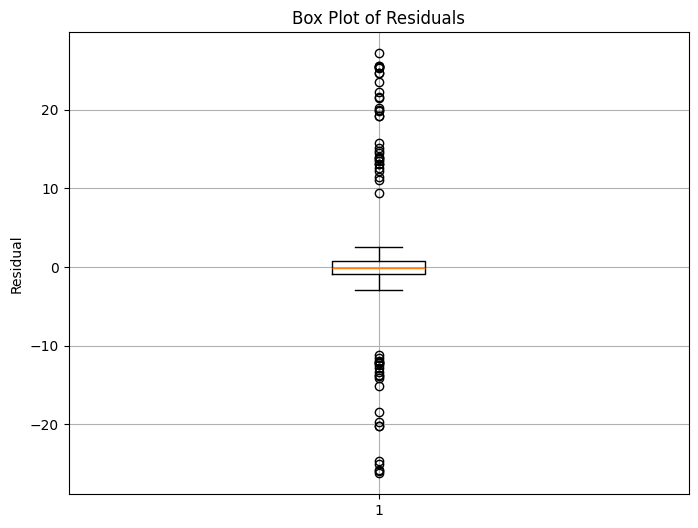

In [145]:
import matplotlib.pyplot as plt

# Create a box plot of the residuals
plt.figure(figsize=(8, 6))
plt.boxplot(dirty_data['residual'].dropna())  # Drop NaN values if any in residuals
plt.title('Box Plot of Residuals')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

##### 4.3.2. Using the quartile ranges show the outliers

In [146]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the residuals
Q1 = dirty_data['residual'].quantile(0.25)
Q3 = dirty_data['residual'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers in residuals
outliers = dirty_data[(dirty_data['residual'] < lower_bound) | (dirty_data['residual'] > upper_bound)]

# Print out the indices and values of the outliers
print("Outlier indices and their corresponding residuals:")
print(outliers[['residual']])

Outlier indices and their corresponding residuals:
     residual
2       21.59
4      -13.28
25     -25.91
28      24.64
30      13.45
38      13.82
47      12.23
49     -12.26
53     -11.13
55     -18.46
65     -20.15
87      25.45
91      19.19
96      27.16
121    -12.23
156     15.76
163    -12.46
172     12.59
174    -13.68
179    -11.61
185     25.48
191     13.13
199     11.11
209    -14.04
217    -13.89
223    -15.17
254      9.46
261    -20.21
262     11.45
272     22.18
301    -26.21
310     19.95
311     19.86
319    -12.84
331     13.71
337    -25.82
348     25.45
356     14.75
363     23.57
372     14.52
389     25.27
426    -12.02
428     25.58
438     19.23
448     21.42
456     24.65
461     13.94
465    -24.60
471     15.12
475     20.19
486    -25.08
492    -19.71
495    -11.94
496     13.15


In [147]:
len(outliers[['residual']])

54

In [148]:
# Get the indices of the outliers
outlier_indices = dirty_data[(dirty_data['residual'] < lower_bound) | (dirty_data['residual'] > upper_bound)].index.tolist()

Check whether the index is already modified or not.

In [149]:
modified_outlier_indices = []

for idx in outlier_indices:
    if dirty_data.loc[idx, 'modified_row'] == 1:
        print(f"Index {idx} is an outlier and has modified_row = 1")
        modified_outlier_indices.append(idx)

# Output the result lists
print("Outlier indices:", outlier_indices)
print("Modified outlier indices:", modified_outlier_indices)

Outlier indices: [2, 4, 25, 28, 30, 38, 47, 49, 53, 55, 65, 87, 91, 96, 121, 156, 163, 172, 174, 179, 185, 191, 199, 209, 217, 223, 254, 261, 262, 272, 301, 310, 311, 319, 331, 337, 348, 356, 363, 372, 389, 426, 428, 438, 448, 456, 461, 465, 471, 475, 486, 492, 495, 496]
Modified outlier indices: []


In [150]:
dirty_data.loc[outlier_indices][['delivery_charges','temp_delivery_charges','residual','modified_row']]

,delivery_charges,temp_delivery_charges,residual,modified_row
2,78.18,99.77,21.59,0
4,77.93,64.65,-13.28,0
25,105.92,80.01,-25.91,0
28,60.86,85.50,24.64,0
30,67.30,80.75,13.45,0
38,63.67,77.49,13.82,0
47,65.21,77.44,12.23,0
49,78.51,66.25,-12.26,0
53,78.11,66.98,-11.13,0
55,78.15,59.69,-18.46,0


So wherever we have outliers of the residual there we don't have any modified rows. Now we have to further check if we flip the value of is_expedited_delivery will it change the prediction and will it be closer.

##### 4.3.3. Check the residual after flipping the values of is_expedited_delivery

In [151]:
# Function to predict delivery charges with flipped is_expedited_delivery
def predict_with_flipped_delivery(row):
    """
    Predict delivery charges with is_expedited_delivery flipped.
    """
    # Flip the value of is_expedited_delivery
    flipped_value = not row['is_expedited_delivery']
    
    # Create the features with the flipped value
    X_flipped = pd.DataFrame([[row['distance_to_nearest_warehouse'], 
                               flipped_value, 
                               row['is_happy_customer']]],
                             columns=['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer'])
    
    # Predict delivery charges using the model for the corresponding season
    model = season_models.get(row['season'])
    new_predicted_value = model.predict(X_flipped)[0]
    
    return new_predicted_value

In [152]:
# Create a new column 'flipped_delivery_charges' for the outlier indices, keep the same value for others
dirty_data['flipped_delivery_charges'] = dirty_data.apply(
    lambda row: predict_with_flipped_delivery(row) if row.name in outlier_indices else row['temp_delivery_charges'], 
    axis=1
)

# Calculate the residuals for the new predictions after flipping for outliers, keep the same for non-outliers
dirty_data['flipped_residual'] = dirty_data.apply(
    lambda row: row['flipped_delivery_charges'] - row['delivery_charges'] if row.name in outlier_indices else row['residual'], 
    axis=1
)

In [153]:
# Display the relevant columns to verify the results
print(dirty_data[['delivery_charges', 'temp_delivery_charges','residual', 'flipped_delivery_charges', 'flipped_residual']].head())

   delivery_charges  temp_delivery_charges  residual  \
0             50.61                  50.57     -0.04   
1             80.33                  79.50     -0.83   
2             78.18                  99.77     21.59   
3             74.47                  73.59     -0.88   
4             77.93                  64.65    -13.28   

   flipped_delivery_charges  flipped_residual  
0                 50.570000         -0.040000  
1                 79.500000         -0.830000  
2                 79.888440          1.708440  
3                 73.590000         -0.880000  
4                 76.906846         -1.023154  


In [154]:
dirty_data.loc[outlier_indices][['delivery_charges', 'temp_delivery_charges','residual', 'flipped_delivery_charges', 'flipped_residual']]

,delivery_charges,temp_delivery_charges,residual,flipped_delivery_charges,flipped_residual
2,78.18,99.77,21.59,79.888440,1.708440
4,77.93,64.65,-13.28,76.906846,-1.023154
25,105.92,80.01,-25.91,104.864715,-1.055285
28,60.86,85.50,24.64,60.645903,-0.214097
30,67.30,80.75,13.45,66.721091,-0.578909
38,63.67,77.49,13.82,63.464535,-0.205465
47,65.21,77.44,12.23,65.179670,-0.030330
49,78.51,66.25,-12.26,78.510223,0.000223
53,78.11,66.98,-11.13,79.232658,1.122658
55,78.15,59.69,-18.46,79.574803,1.424803


Plot the box plot of residuals after flipping the values in is_expedited_delivery

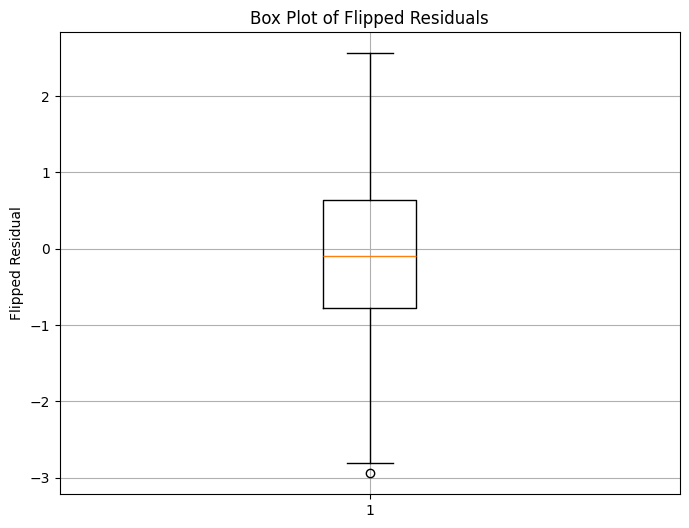

In [155]:
import matplotlib.pyplot as plt

# Create a box plot for the flipped_residuals
plt.figure(figsize=(8, 6))
plt.boxplot(dirty_data['flipped_residual'].dropna())  # Drop NaN values if any in flipped_residual
plt.title('Box Plot of Flipped Residuals')
plt.ylabel('Flipped Residual')
plt.grid(True)
plt.show()

- Based on the analysis of the box plots before and after flipping the is_expedited_delivery values for the outlier rows, it’s clear that the outliers in these rows were likely due to errors in the is_expedited_delivery column. 
- Flipping these values significantly improved the accuracy of the predictions by reducing the residual. Initially, the residuals showed a wide spread with many extreme outliers, indicating that the model’s predictions deviated considerably from the actual delivery charges. After flipping is_expedited_delivery, the residuals became much more centralized around zero, and the number of outliers drastically reduced.
- This suggests that the incorrect is_expedited_delivery values were causing the large deviations in predictions. And we need to flip these values.

In [156]:
# Verify the changes by checking the outlier rows before flipping
dirty_data.loc[outlier_indices, ['is_expedited_delivery', 'residual']].head()

,is_expedited_delivery,residual
2,True,21.59
4,False,-13.28
25,False,-25.91
28,True,24.64
30,True,13.45


In [157]:
# Flip the is_expedited_delivery values for the rows with outliers
dirty_data.loc[outlier_indices, 'is_expedited_delivery'] = dirty_data.loc[outlier_indices, 'is_expedited_delivery'].apply(lambda x: not x)

In [158]:
# After flipping, add +1 to the modified_row column for the rows in outlier_indices
dirty_data.loc[outlier_indices, 'modified_row'] += 1

In [159]:
# Verify the changes by checking the outlier rows after flipping the values
dirty_data.loc[outlier_indices, ['is_expedited_delivery', 'flipped_residual']].head()

,is_expedited_delivery,flipped_residual
2,False,1.708440
4,True,-1.023154
25,True,-1.055285
28,False,-0.214097
30,False,-0.578909


In [160]:
dirty_data['modified_row'].sum()

297

So we have rectified 297 errors in the dirty data and we have corrected those errors.

# 5. Rectifying Outliers in the Outlier Data

* Here we need to detect and remove outlier rows in delivery_charges only

### 5.1 Understanding Structure of the Outlier Data Set. 

In [161]:
# Check for null values in outlier_data if any
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

### 5.2 Implemented Methodlogy 

To accurately identify outliers in delivery_charges, we cannot rely on simple methods like box plots or scatter plots. This is because delivery_charges are influenced by multiple factors (multivariate dependencies), including the distance to the nearest warehouse, whether the delivery is expedited, and customer satisfaction. 
- These factors vary depending on the season, and they all play a role in determining the expected delivery charge. **If we try to identify outliers without considering these relationships, we might miss important patterns or incorrectly label normal data points as outliers.**

- By using models that take these key attributes into account, we can predict what the delivery charges should be for each order. The difference between the actual delivery charge and the predicted value, known as the residual, helps us understand how much each charge deviates from the expected value.
- Plotting (Box plot) these residuals gives us a clearer view of which delivery charges are unusually high or low, relative to the influencing factors. 

### 5.3 Implemented Code 

##### Now to create a new column named residual in your outlier_data DataFrame, we can use the previously trained models for each season to predict the delivery_charges and compute the residuals as the difference between the original delivery_charges and the predicted values.

##### 5.3.1 Predict the values of delivery_charges

In [162]:
# Function to predict delivery charges for each row in outlier_data using the trained models
def predict_delivery_charges_outlier(row):
    # Extract the relevant features for prediction
    X = pd.DataFrame([[row['distance_to_nearest_warehouse'], 
                       row['is_expedited_delivery'], 
                       row['is_happy_customer']]],
                     columns=['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer'])
    
    # Get the model based on the season for this row
    model = season_models.get(row['season'])
    
    # Predict the delivery charges for this row
    return round(model.predict(X)[0], 2)

In [163]:
# Create a new column 'predicted_delivery_charges' using the models
outlier_data['predicted_delivery_charges'] = outlier_data.apply(predict_delivery_charges_outlier, axis=1)

In [164]:
outlier_data[['delivery_charges', 'predicted_delivery_charges']]

,delivery_charges,predicted_delivery_charges
0,63.02,63.57
1,84.37,84.75
2,100.88,100.69
3,80.25,79.00
4,78.43,78.54
...,...,...
495,48.22,49.39
496,48.82,49.42
497,71.15,71.62
498,75.57,76.61


##### 5.3.2 Finding and Plotting the outliers

In [165]:
# Calculate the residuals as the difference between original and predicted delivery charges
outlier_data['residual'] = outlier_data['delivery_charges'] - outlier_data['predicted_delivery_charges']

In [166]:
# Display the residuals along with original delivery charges and predicted delivery charges
outlier_data[['delivery_charges', 'predicted_delivery_charges', 'residual']]

,delivery_charges,predicted_delivery_charges,residual
0,63.02,63.57,-0.55
1,84.37,84.75,-0.38
2,100.88,100.69,0.19
3,80.25,79.00,1.25
4,78.43,78.54,-0.11
...,...,...,...
495,48.22,49.39,-1.17
496,48.82,49.42,-0.60
497,71.15,71.62,-0.47
498,75.57,76.61,-1.04


Now plotting a box plot of the residuals

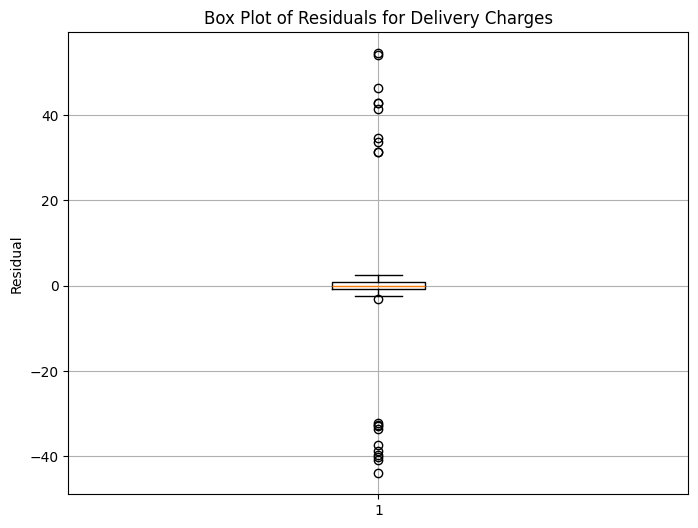

In [167]:
# Plot a box plot of the residuals to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(outlier_data['residual'].dropna())  # Ensure to drop NaN values
plt.title('Box Plot of Residuals for Delivery Charges')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

##### Filtering out the outliers using quartlie method.
- Here we are considering the lower bound and upper bound of the box plot to remove the outliers. And instead of using the delivery_charges right away we are using the residual which we have get from the delivery_charges and predicted delivery_charges.

In [168]:
# Calculate the interquartile range (IQR) to identify outliers
Q1 = outlier_data['residual'].quantile(0.25)
Q3 = outlier_data['residual'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [169]:
# Get the outliers based on the residuals
outliers = outlier_data[(outlier_data['residual'] <= lower_bound) | (outlier_data['residual'] >= upper_bound)]

In [170]:
outliers[['delivery_charges', 'predicted_delivery_charges', 'residual']]

,delivery_charges,predicted_delivery_charges,residual
22,84.000,87.01,-3.010
49,31.535,64.21,-32.675
80,40.105,80.89,-40.785
118,95.460,61.70,33.760
120,98.295,67.05,31.245
143,124.095,82.64,41.455
164,161.295,106.79,54.505
203,104.745,70.02,34.725
212,44.045,88.00,-43.955
248,38.595,77.26,-38.665


In [171]:
# Get the non-outliers based on the residuals
without_outliers = outlier_data[(outlier_data['residual'] >= lower_bound) & (outlier_data['residual'] <= upper_bound)]

In [172]:
without_outliers[['delivery_charges', 'predicted_delivery_charges', 'residual']]

,delivery_charges,predicted_delivery_charges,residual
0,63.02,63.57,-0.55
1,84.37,84.75,-0.38
2,100.88,100.69,0.19
3,80.25,79.00,1.25
4,78.43,78.54,-0.11
...,...,...,...
495,48.22,49.39,-1.17
496,48.82,49.42,-0.60
497,71.15,71.62,-0.47
498,75.57,76.61,-1.04


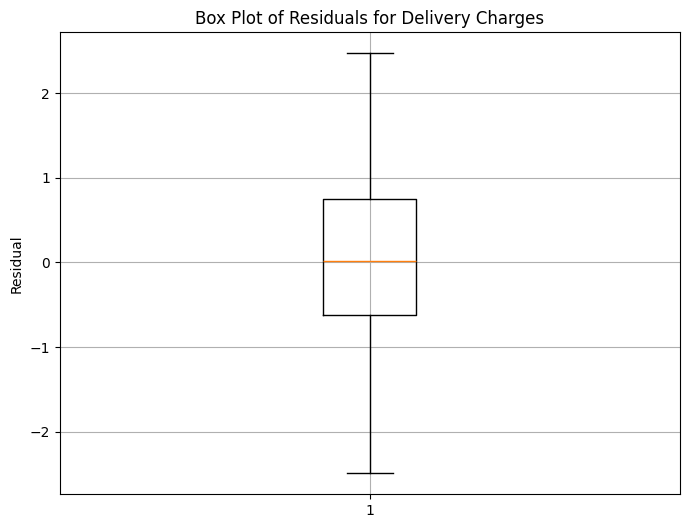

In [173]:
# Plot a box plot of the residuals after removing the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(without_outliers['residual'].dropna())  # Ensure to drop NaN values
plt.title('Box Plot of Residuals for Delivery Charges')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# 6. Save the cleaned and modified solution csv 

### 6.1 Saving the outlier solution file

In [174]:
without_outliers.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer', 'predicted_delivery_charges', 'residual'],
      dtype='object')

In [175]:
# Drop the predicted_delivery_charges and residual columns from the outlier_data
without_outliers = without_outliers.drop(columns=['predicted_delivery_charges', 'residual'])

# Verify by showing the first few rows
without_outliers.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD466786,ID1327098179,2019-06-06,Nickolson,"[('Candle Inferno', 2), ('Olivia x460', 2), ('...",5770,63.02,-37.813705,144.965537,0,5833.02,Winter,False,0.6488,amazing for a refurbished phone. the actual us...,True
1,ORD304521,ID4957761326,2019-03-28,Thompson,"[('Alcon 10', 1), ('iAssist Line', 1), ('Thund...",13355,84.37,-37.824592,144.929006,5,12771.62,Autumn,True,2.0696,notes are awesome love it even though i sure d...,True
2,ORD378380,ID0643985980,2019-10-07,Bakers,"[('Universe Note', 2), ('Toshika 750', 2)]",15540,100.88,-37.815300,144.990285,10,14086.88,Spring,True,0.7334,good product fast operation,True
3,ORD477274,ID2190625294,2019-10-07,Nickolson,"[('Universe Note', 1), ('Candle Inferno', 1), ...",8330,80.25,-37.809622,144.963621,15,7160.75,Spring,False,1.1268,great my mom love it,True
4,ORD444138,ID2950388058,2019-03-03,Nickolson,"[('iStream', 1), ('Olivia x460', 2), ('pearTV'...",8910,78.43,-37.819536,144.961652,10,8097.43,Autumn,True,0.7025,five stars i love this phone...,True


In [176]:
without_outliers.shape

(479, 16)

There were 21 outliers in the outlier data which we have found and we have successfully removed them.

Check the dtypes and columns before saving the file

In [177]:
without_outliers.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

In [178]:
without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       479 non-null    object 
 1   customer_id                    479 non-null    object 
 2   date                           479 non-null    object 
 3   nearest_warehouse              479 non-null    object 
 4   shopping_cart                  479 non-null    object 
 5   order_price                    479 non-null    int64  
 6   delivery_charges               479 non-null    float64
 7   customer_lat                   479 non-null    float64
 8   customer_long                  479 non-null    float64
 9   coupon_discount                479 non-null    int64  
 10  order_total                    479 non-null    float64
 11  season                         479 non-null    object 
 12  is_expedited_delivery          479 non-null    bool   


In [179]:
without_outliers.to_csv("Group142_outlier_data_solution.csv", index = False)

### 6.2 Saving the Dirty data solution file

In [180]:
dirty_data.shape

(500, 23)

In [181]:
dirty_data.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer', 'modified_row', 'calculated_nearest_warehouse',
       'calculated_distance_to_warehouse', 'temp_delivery_charges', 'residual',
       'flipped_delivery_charges', 'flipped_residual'],
      dtype='object')

In [182]:
dirty_data['modified_row'].sum()

297

In [183]:
# Drop the specified columns from the dirty_data DataFrame
dirty_data = dirty_data.drop(columns=['modified_row', 'calculated_nearest_warehouse', 'calculated_distance_to_warehouse',
                                      'temp_delivery_charges', 'residual', 'flipped_delivery_charges', 'flipped_residual'])

In [184]:
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD489385,ID0593055577,2019-06-06,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('iStre...",16060,50.61,-37.811464,144.963864,25,12095.61,Winter,False,0.9383,"i bought this phone for my mom in africa, ... ...",False
1,ORD209758,ID4360100212,2019-07-12,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('Thunder ...",13980,80.33,-37.817264,145.006077,15,11963.33,Winter,True,1.2507,"five stars works great, affordable. looking fo...",True
2,ORD101470,ID0361797209,2019-01-13,Nickolson,"[('Olivia x460', 2), ('iStream', 2)]",2750,78.18,-37.807490,144.978630,0,2828.18,Summer,False,1.4716,"five stars good phone, arrived on time, is fac...",True
3,ORD171003,ID1492150977,2019-09-09,Thompson,"[('Alcon 10', 1), ('Thunder line', 1), ('Toshi...",20200,74.47,-37.814166,144.951873,5,19264.47,Spring,False,0.4540,NaN,True
4,ORD426363,ID2776396935,2019-07-17,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",12400,77.93,-37.812966,144.963430,5,11857.93,Winter,True,0.8260,"great product ! it checks all of the boxes, pl...",True


In [185]:
dirty_data.shape

(500, 16)

In [186]:
dirty_data.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

In [187]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [188]:
# Save the .csv
dirty_data.to_csv("Group142_dirty_data_solution.csv", index = False)

### 6.3 Saving the missing data solution file

In [189]:
# Check for columns in missing data
missing_data.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

In [190]:
missing_data.shape

(500, 16)

In [191]:
# Displaying and Validating first few rows
missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD479736,ID0581712804,2019-02-19,Thompson,"[('Candle Inferno', 1), ('Lucent 330S', 1), ('...",6335.0,102.82,-37.805685,144.928077,25,4854.07,Summer,True,1.8425,"screen size i like the display , it's bright a...",1.0
1,ORD445657,ID1287239241,2019-08-18,Nickolson,"[('iAssist Line', 1), ('Lucent 330S', 2), ('iS...",4985.0,84.86,-37.798717,144.967352,10,4571.36,Winter,True,2.2212,very happy with purchase phone as advertised (...,1.0
2,ORD013238,ID0608812335,2019-03-20,Nickolson,"[('iAssist Line', 1), ('Olivia x460', 2), ('To...",13315.0,78.30,-37.817047,144.964050,25,10064.55,Autumn,True,0.5135,"nice phone, unfortunately it not for the netwo...",1.0
3,ORD110752,ID5371634609,2019-08-19,Nickolson,"[('Olivia x460', 2), ('iStream', 1)]",2600.0,80.47,-37.806955,144.965246,5,2550.47,Winter,True,1.3500,a really good phone this phone is very good. i...,1.0
4,ORD304214,ID0129279833,2019-05-24,Bakers,"[('Toshika 750', 2), ('Candle Inferno', 1), ('...",9220.0,79.79,-37.802080,144.995053,25,6994.79,Autumn,True,0.8813,five stars very nice device and quality matche...,1.0


In [192]:
# Checking for missing values
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [193]:
# Saving the solution csv
missing_data.to_csv("Group142_missing_data_solution.csv", index = False)

# 7. References:
- https://help.arcgis.com/en/geodatabase/10.0/sdk/arcsde/concepts/geometry/coordref/coordsys/geographic/geographic.htm#
- https://realpython.com/python-linear-algebra/
- https://medium.com/@gelsonm/to-use-or-lose-stop-words-in-nlp-de946edaa468